In [10]:
# Training 25 nih models 
import pandas as pd 
import os 
import numpy as np
import subprocess

# File paths and setup
parent = '/home/jkim/research/peds_cxr/'
# Predefined 25 random seeds
predefined_seeds = [9,17,18,29,30,34,41,42,51,52,61,66,74,75,78,81,84,86,87,89,90,92,96,98,99]

### set source
metadata_source = parent + '25variation/metadata/final/nih/' 

for seed in predefined_seeds:
    image_source = parent + '25variation/images/nih/nih_' + str(seed)
    # Load the data from the CSV file into a pandas DataFrame
    nih_metadata_path = metadata_source + f'/nih_metadata_seed_{seed}.csv'
    nih_metadata = pd.read_csv(nih_metadata_path)

    # Creating image_paths.txt
    image_path = nih_metadata['Image Index']
    output_image_txt = image_source + '/image_paths.txt'
    image_path.to_csv(output_image_txt, sep=",", index=False, header=False)

    # Creating train.txt 
    train_index = nih_metadata[nih_metadata['Set']=='train']
    nih_train_output = image_source + '/train.txt'
    nih_train_txt = train_index['Image Index'] 
    nih_train_txt.to_csv(nih_train_output, sep=',', index=False, header=False)

    # Creating val.txt 
    val_index = nih_metadata[nih_metadata['Set']=='val']
    nih_val_output = image_source + '/val.txt'
    nih_val_txt = val_index['Image Index'] 
    nih_val_txt.to_csv(nih_val_output, sep=',', index=False, header=False)

    # Creating test.txt
    test_index = nih_metadata[nih_metadata['Set']=='test']
    nih_test_output = image_source + '/nih_test.txt'
    nih_test_txt = test_index['Image Index'] 
    nih_test_txt.to_csv(nih_test_output, sep=',', index=False, header=False)

    # Creating labels.csv
    nih_labels_output = image_source + '/labels.csv'
    nih_labels = nih_metadata[['Image Index', 'No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia']]

    # rename Image Index to Image
    nih_labels = nih_labels.rename(columns={'Image Index': 'Image'})
    nih_labels.to_csv(nih_labels_output, sep=',', index=False)

    # confirming the number of train val and test. 
    print("# of train:",len(nih_train_txt))
    print('# of val:',len(nih_val_txt))
    print('# of test:',len(nih_test_txt))
    print('# of image path:',len(image_path))
    print('# of labels:',len(nih_labels))


# of train: 3067
# of val: 551
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3027
# of val: 591
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3168
# of val: 450
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3275
# of val: 343
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3154
# of val: 464
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3248
# of val: 370
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3152
# of val: 466
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3118
# of val: 500
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3206
# of val: 412
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3152
# of val: 466
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3171
# of val: 447
# of test: 1050
# of image path: 4668
# of labels: 4668
# of train: 3184
# of val: 434
# of test: 1

In [11]:
# Create json file. 

import json
import os

# Base JSON content template
json_template = {
    "data_dir": "/home/jkim/research/peds_cxr/25variation/images/nih/",
    "labels": ["No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"],
    "dataset_nicenames": {
        "nihcxr14_test": "NIH CXR14",
        "chexpert_test": "CheXpert",
        "mimic_test": "MIMIC",
        "padchest_test": "PadChest",
        "rsna_pneumonia_test_100": "RSNA Pneumonia",
        "rsna_pneumonia_DeiT-B_test_100": "RSNA Pneumonia DeiT-B",
        "nih_DenseNet121_nih_test": "nih DenseNet121"
    }
}

# Loop through each seed to generate JSON files
for seed in predefined_seeds:
    # Construct the new directory path
    new_data_dir = f"/home/jkim/research/peds_cxr/25variation/images/nih/nih_{seed}/"
    
    # Create the new directory if it doesn't exist
    if not os.path.exists(new_data_dir):
        print(f"The directory {new_data_dir} does not exist. Creating it.")
        os.makedirs(new_data_dir)

    # Specify the path for the new JSON file
    new_json_path = os.path.join(new_data_dir, f"cfg_nih_{seed}.json")

    # Write the JSON file
    with open(new_json_path, 'w') as f:
        json.dump(json_template, f, indent=4)
    
    print(f"Created new JSON file at {new_json_path}")

# batch creating result directiory
for seed in predefined_seeds:
    # Construct the new directory path for results
    new_result_dir = f"/home/jkim/research/peds_cxr/25variation/results/nih/train/nih_{seed}/"
    
    # Create the new directory if it doesn't exist
    if not os.path.exists(new_result_dir):
        os.makedirs(new_result_dir)

Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_9/cfg_nih_9.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_17/cfg_nih_17.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_18/cfg_nih_18.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_29/cfg_nih_29.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_30/cfg_nih_30.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_34/cfg_nih_34.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_41/cfg_nih_41.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_42/cfg_nih_42.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_51/cfg_nih_51.json
Created new JSON file at /home/jkim/research/peds_cxr/25variation/images/nih/nih_52/cfg_nih_52.json
Cr

In [12]:
# # NIH Gridsearch
# import pandas as pd 
# import os 
# import numpy as np
# import subprocess

# # Define a list of hyperparameters to test
# optimizers = ['SGD','AdamW'] 
# initial_lrs = [5e-3, 1e-2, 5e-2, 1e-1]
# weight_decays = [0, 1e-5, 1e-4, 1e-3]
# dropouts = [0, 0.5]
# gpu='3' 

# # Iterate over the hyperparameters
# for seed in ['42']:    
#     for optimizer in optimizers:
#         for initial_lr in initial_lrs:
#             for weight_decay in weight_decays:
#                 for dropout in dropouts:
#                     # Construct the command with updated hyperparameters
#                     command = [
#                         'python3',
#                         parent + 'transformer-radiographs/train_cxr.py',
#                         '--cfg-dir',
#                         parent + f'25variation/images/nih/nih_{seed}/cfg_nih_{seed}.json',
#                         '--dataset',
#                         f'nih_{seed}',
#                         '--labels-set',
#                         'labels',
#                         '--architecture',
#                         'DenseNet121',
#                         '--results-dir',
#                         parent + '25variation/results/nih/train/nih_' + str(seed),
#                         '--optimizer-family',
#                         optimizer,
#                         '--dropout',
#                         str(dropout),
#                         '--weight-decay',
#                         str(weight_decay),
#                         '--initial-lr',
#                         str(initial_lr),
#                         '--drop-factor',
#                         '0.1',
#                         '--plateau-patience',
#                         '3',
#                         '--plateau-threshold',
#                         '1e-4',
#                         '--break-patience',
#                         '5',
#                         '--train-transform',
#                         'peds',
#                         '--train-file',
#                         'train.txt',
#                         '--val-file',
#                         'val.txt',
#                         '--use-gpus',
#                         gpu
#                     ]

#                     # Execute the command
#                     subprocess.run(command)

In [13]:
# DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1708396539.txt

import pandas as pd 
import os 
import numpy as np
import subprocess

# Predefined 25 random seeds
optimizers = ['SGD']
initial_lrs = [0.005]
weight_decays = [1e-4]
dropouts = [0.0]
gpu='1' 

# Iterate over the hyperparameters
for seed in predefined_seeds:    
    for optimizer in optimizers:
        for initial_lr in initial_lrs:
            for weight_decay in weight_decays:
                for dropout in dropouts:
                    # Construct the command with updated hyperparameters
                    command = [
                        'python3',
                        parent + 'transformer-radiographs/train_cxr.py',
                        '--cfg-dir',
                        parent + f'25variation/images/nih/nih_{seed}/cfg_nih_{seed}.json',
                        '--dataset',
                        f'nih_{seed}',
                        '--labels-set',
                        'labels',
                        '--architecture',
                        'DenseNet121',
                        '--results-dir',
                        parent + '25variation/results/nih/train/nih_' + str(seed),
                        '--optimizer-family',
                        optimizer,
                        '--dropout',
                        str(dropout),
                        '--weight-decay',
                        str(weight_decay),
                        '--initial-lr',
                        str(initial_lr),
                        '--drop-factor',
                        '0.1',
                        '--plateau-patience',
                        '3',
                        '--plateau-threshold',
                        '1e-4',
                        '--break-patience',
                        '5',
                        '--train-transform',
                        'peds',
                        '--train-file',
                        'train.txt',
                        '--val-file',
                        'val.txt',
                        '--use-gpus',
                        gpu
                    ]

                    # Execute the command
                    subprocess.run(command)

{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_9', 'train_file': 'train.txt', 'val_file': 'val.txt', 'use_parallel': True, 'train_transform': 'peds', 'num_workers': 12, 'fold': 0, 'norm_layer': 'batch', 'dropout': 0.0, 'use_mixup': False, 'img_size': 224, 'print_batches': False, 'scratch_dir': '/home/jkim/scratch', 'results_dir': '/home/jkim/research/peds_cxr/25variation/results/nih/train/nih_9', 'results_file': 'DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlba

  0%|          | 0/192 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3074 Val loss: 0.3139 Train auc: 0.6677 Val auc: 0.6812 Time (min): 0.24 Total time: 0.24


  0%|          | 0/192 [00:00<?, ?it/s]

Epoch 1	Train loss: 0.2783 Val loss: 0.3246 Train auc: 0.7368 Val auc: 0.6813 Time (min): 0.20 Total time: 0.44


  0%|          | 0/192 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2688 Val loss: 0.3179 Train auc: 0.7594 Val auc: 0.6612 Time (min): 0.20 Total time: 0.64


100%|██████████| 35/35 [00:01<00:00, 18.50it/s]


New best!
Epoch 3	Train loss: 0.2515 Val loss: 0.3103 Train auc: 0.8068 Val auc: 0.6945 Time (min): 0.20 Total time: 0.84


  0%|          | 0/192 [00:00<?, ?it/s]

New best!
Epoch 4	Train loss: 0.2465 Val loss: 0.3120 Train auc: 0.8143 Val auc: 0.6995 Time (min): 0.20 Total time: 1.04


  0%|          | 0/192 [00:00<?, ?it/s]

New best!
Epoch 5	Train loss: 0.2400 Val loss: 0.3117 Train auc: 0.8296 Val auc: 0.7005 Time (min): 0.20 Total time: 1.24


  0%|          | 0/192 [00:00<?, ?it/s]

New best!
Epoch 6	Train loss: 0.2362 Val loss: 0.3100 Train auc: 0.8365 Val auc: 0.7006 Time (min): 0.20 Total time: 1.44


  0%|          | 0/192 [00:00<?, ?it/s]

New best!
Epoch 7	Train loss: 0.2366 Val loss: 0.3111 Train auc: 0.8352 Val auc: 0.7025 Time (min): 0.20 Total time: 1.64


  0%|          | 0/192 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2362 Val loss: 0.3103 Train auc: 0.8362 Val auc: 0.7011 Time (min): 0.20 Total time: 1.84


  0%|          | 0/192 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2348 Val loss: 0.3083 Train auc: 0.8401 Val auc: 0.6991 Time (min): 0.20 Total time: 2.04


  0%|          | 0/192 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2353 Val loss: 0.3102 Train auc: 0.8401 Val auc: 0.7014 Time (min): 0.20 Total time: 2.24


  0%|          | 0/192 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2359 Val loss: 0.3114 Train auc: 0.8386 Val auc: 0.7018 Time (min): 0.20 Total time: 2.44


  0%|          | 0/192 [00:00<?, ?it/s]

Epoch 12	Train loss: 0.2359 Val loss: 0.3146 Train auc: 0.8367 Val auc: 0.7008 Time (min): 0.20 Total time: 2.64


100%|██████████| 35/35 [00:01<00:00, 18.89it/s]


Epoch 13	Train loss: 0.2348 Val loss: 0.3126 Train auc: 0.8387 Val auc: 0.6998 Time (min): 0.20 Total time: 2.84
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709012319.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,7,0.236643987474963,0.3110610817159925,0.7025263296143751,1.6409822185834249
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_17', 'train_file': 'train.txt', 'val_file': 'val.txt', 

  0%|          | 0/190 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3092 Val loss: 0.2901 Train auc: 0.6647 Val auc: 0.7545 Time (min): 0.24 Total time: 0.24


  0%|          | 0/190 [00:00<?, ?it/s]

Epoch 1	Train loss: 0.2814 Val loss: 0.2961 Train auc: 0.7267 Val auc: 0.7438 Time (min): 0.20 Total time: 0.44


  0%|          | 0/190 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2760 Val loss: 0.2919 Train auc: 0.7430 Val auc: 0.7631 Time (min): 0.20 Total time: 0.64


  0%|          | 0/190 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2563 Val loss: 0.2879 Train auc: 0.7925 Val auc: 0.7561 Time (min): 0.20 Total time: 0.84


  0%|          | 0/190 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2527 Val loss: 0.2896 Train auc: 0.8057 Val auc: 0.7559 Time (min): 0.20 Total time: 1.04


  0%|          | 0/190 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2439 Val loss: 0.2916 Train auc: 0.8236 Val auc: 0.7496 Time (min): 0.20 Total time: 1.24


  0%|          | 0/190 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2465 Val loss: 0.2939 Train auc: 0.8221 Val auc: 0.7515 Time (min): 0.20 Total time: 1.44


  0%|          | 0/190 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2423 Val loss: 0.2904 Train auc: 0.8242 Val auc: 0.7510 Time (min): 0.20 Total time: 1.63


100%|██████████| 37/37 [00:01<00:00, 18.57it/s]


Epoch 8	Train loss: 0.2417 Val loss: 0.2901 Train auc: 0.8261 Val auc: 0.7517 Time (min): 0.20 Total time: 1.84
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709012494.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,2,0.2759905086536157,0.29189449508447907,0.7630696972714349,0.6376539746920268
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_18', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/198 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3102 Val loss: 0.2961 Train auc: 0.6691 Val auc: 0.7081 Time (min): 0.23 Total time: 0.23


100%|██████████| 29/29 [00:01<00:00, 16.86it/s]


New best!
Epoch 1	Train loss: 0.2883 Val loss: 0.2817 Train auc: 0.7176 Val auc: 0.7257 Time (min): 0.20 Total time: 0.43


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2770 Val loss: 0.2966 Train auc: 0.7447 Val auc: 0.6891 Time (min): 0.20 Total time: 0.63


100%|██████████| 29/29 [00:01<00:00, 16.77it/s]


New best!
Epoch 3	Train loss: 0.2614 Val loss: 0.2828 Train auc: 0.7896 Val auc: 0.7301 Time (min): 0.20 Total time: 0.84


100%|██████████| 29/29 [00:01<00:00, 17.15it/s]


New best!
Epoch 4	Train loss: 0.2555 Val loss: 0.2746 Train auc: 0.8016 Val auc: 0.7340 Time (min): 0.20 Total time: 1.04


100%|██████████| 29/29 [00:01<00:00, 17.07it/s]


New best!
Epoch 5	Train loss: 0.2526 Val loss: 0.2810 Train auc: 0.8081 Val auc: 0.7354 Time (min): 0.20 Total time: 1.24


100%|██████████| 29/29 [00:01<00:00, 16.60it/s]


New best!
Epoch 6	Train loss: 0.2492 Val loss: 0.2761 Train auc: 0.8170 Val auc: 0.7357 Time (min): 0.20 Total time: 1.44


100%|██████████| 29/29 [00:01<00:00, 16.65it/s]


New best!
Epoch 7	Train loss: 0.2489 Val loss: 0.2729 Train auc: 0.8187 Val auc: 0.7359 Time (min): 0.21 Total time: 1.64


100%|██████████| 29/29 [00:01<00:00, 17.13it/s]


New best!
Epoch 8	Train loss: 0.2481 Val loss: 0.2751 Train auc: 0.8193 Val auc: 0.7362 Time (min): 0.20 Total time: 1.84


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2485 Val loss: 0.2809 Train auc: 0.8174 Val auc: 0.7354 Time (min): 0.20 Total time: 2.05


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2469 Val loss: 0.2733 Train auc: 0.8213 Val auc: 0.7353 Time (min): 0.21 Total time: 2.25


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2477 Val loss: 0.2737 Train auc: 0.8203 Val auc: 0.7351 Time (min): 0.20 Total time: 2.46


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 12	Train loss: 0.2470 Val loss: 0.2752 Train auc: 0.8219 Val auc: 0.7344 Time (min): 0.20 Total time: 2.66


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 13	Train loss: 0.2483 Val loss: 0.2993 Train auc: 0.8206 Val auc: 0.7341 Time (min): 0.21 Total time: 2.86


100%|██████████| 29/29 [00:01<00:00, 16.66it/s]


Epoch 14	Train loss: 0.2473 Val loss: 0.2770 Train auc: 0.8219 Val auc: 0.7329 Time (min): 0.20 Total time: 3.07
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709012609.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,8,0.24811984109457097,0.2750753290180502,0.7361650681685332,1.842965614795685
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_29', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/205 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3123 Val loss: 0.2738 Train auc: 0.6602 Val auc: 0.6947 Time (min): 0.24 Total time: 0.24


  0%|          | 0/205 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2830 Val loss: 0.2732 Train auc: 0.7393 Val auc: 0.6958 Time (min): 0.21 Total time: 0.45


  0%|          | 0/205 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2733 Val loss: 0.2663 Train auc: 0.7631 Val auc: 0.7138 Time (min): 0.20 Total time: 0.65


  0%|          | 0/205 [00:00<?, ?it/s]

New best!
Epoch 3	Train loss: 0.2570 Val loss: 0.2708 Train auc: 0.8030 Val auc: 0.7202 Time (min): 0.20 Total time: 0.85


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2503 Val loss: 0.2705 Train auc: 0.8157 Val auc: 0.7183 Time (min): 0.20 Total time: 1.05


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2474 Val loss: 0.2624 Train auc: 0.8221 Val auc: 0.7174 Time (min): 0.20 Total time: 1.26


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2459 Val loss: 0.2745 Train auc: 0.8238 Val auc: 0.7143 Time (min): 0.20 Total time: 1.46


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2436 Val loss: 0.2665 Train auc: 0.8302 Val auc: 0.7179 Time (min): 0.20 Total time: 1.66


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2461 Val loss: 0.2667 Train auc: 0.8236 Val auc: 0.7160 Time (min): 0.20 Total time: 1.87


100%|██████████| 22/22 [00:01<00:00, 14.02it/s]


Epoch 9	Train loss: 0.2453 Val loss: 0.2664 Train auc: 0.8265 Val auc: 0.7153 Time (min): 0.20 Total time: 2.07
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709012798.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,3,0.2570087280215288,0.27080770785158326,0.7202027225047073,0.8496464530626933
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_30', 'train_file': 'train.txt', 'val_file': 'val.txt',

100%|██████████| 29/29 [00:01<00:00, 16.67it/s]


New best!
Epoch 0	Train loss: 0.3178 Val loss: 0.2720 Train auc: 0.6439 Val auc: 0.7257 Time (min): 0.24 Total time: 0.24


100%|██████████| 29/29 [00:01<00:00, 15.88it/s]


New best!
Epoch 1	Train loss: 0.2890 Val loss: 0.2709 Train auc: 0.7304 Val auc: 0.7418 Time (min): 0.21 Total time: 0.44


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2793 Val loss: 0.2697 Train auc: 0.7419 Val auc: 0.7388 Time (min): 0.20 Total time: 0.65


100%|██████████| 29/29 [00:01<00:00, 17.04it/s]


New best!
Epoch 3	Train loss: 0.2581 Val loss: 0.2676 Train auc: 0.8006 Val auc: 0.7511 Time (min): 0.20 Total time: 0.85


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2575 Val loss: 0.2670 Train auc: 0.7995 Val auc: 0.7454 Time (min): 0.20 Total time: 1.05


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2550 Val loss: 0.2660 Train auc: 0.8103 Val auc: 0.7472 Time (min): 0.20 Total time: 1.25


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2511 Val loss: 0.2667 Train auc: 0.8143 Val auc: 0.7443 Time (min): 0.20 Total time: 1.45


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2512 Val loss: 0.2673 Train auc: 0.8125 Val auc: 0.7446 Time (min): 0.20 Total time: 1.65


100%|██████████| 29/29 [00:01<00:00, 15.48it/s]


New best!
Epoch 8	Train loss: 0.2492 Val loss: 0.2663 Train auc: 0.8170 Val auc: 0.7518 Time (min): 0.20 Total time: 1.86


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2499 Val loss: 0.2668 Train auc: 0.8170 Val auc: 0.7480 Time (min): 0.20 Total time: 2.06


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2503 Val loss: 0.2672 Train auc: 0.8192 Val auc: 0.7461 Time (min): 0.20 Total time: 2.26


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2529 Val loss: 0.2663 Train auc: 0.8158 Val auc: 0.7502 Time (min): 0.20 Total time: 2.46


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 12	Train loss: 0.2525 Val loss: 0.2673 Train auc: 0.8166 Val auc: 0.7471 Time (min): 0.20 Total time: 2.66


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 13	Train loss: 0.2513 Val loss: 0.2670 Train auc: 0.8130 Val auc: 0.7473 Time (min): 0.20 Total time: 2.87


100%|██████████| 29/29 [00:01<00:00, 16.14it/s]


Epoch 14	Train loss: 0.2493 Val loss: 0.2672 Train auc: 0.8198 Val auc: 0.7466 Time (min): 0.20 Total time: 3.07
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709012928.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,8,0.24924080773736498,0.2663014654455514,0.7517986642058313,1.8568973501523338
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_34', 'train_file': 'train.txt', 'val_file': 'val.txt'

  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3106 Val loss: 0.2780 Train auc: 0.6667 Val auc: 0.6782 Time (min): 0.23 Total time: 0.23


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2867 Val loss: 0.2626 Train auc: 0.7235 Val auc: 0.7415 Time (min): 0.20 Total time: 0.43


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2748 Val loss: 0.2675 Train auc: 0.7545 Val auc: 0.7372 Time (min): 0.20 Total time: 0.63


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 3	Train loss: 0.2619 Val loss: 0.2659 Train auc: 0.7846 Val auc: 0.7466 Time (min): 0.20 Total time: 0.83


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 4	Train loss: 0.2559 Val loss: 0.2568 Train auc: 0.8026 Val auc: 0.7468 Time (min): 0.20 Total time: 1.02


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 5	Train loss: 0.2535 Val loss: 0.2568 Train auc: 0.8071 Val auc: 0.7506 Time (min): 0.20 Total time: 1.22


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 6	Train loss: 0.2485 Val loss: 0.2842 Train auc: 0.8190 Val auc: 0.7515 Time (min): 0.20 Total time: 1.42


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2493 Val loss: 0.2556 Train auc: 0.8152 Val auc: 0.7514 Time (min): 0.20 Total time: 1.62


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2484 Val loss: 0.2534 Train auc: 0.8195 Val auc: 0.7508 Time (min): 0.20 Total time: 1.82


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 9	Train loss: 0.2478 Val loss: 0.2633 Train auc: 0.8213 Val auc: 0.7518 Time (min): 0.20 Total time: 2.02


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2482 Val loss: 0.2682 Train auc: 0.8195 Val auc: 0.7483 Time (min): 0.20 Total time: 2.22


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2471 Val loss: 0.2719 Train auc: 0.8224 Val auc: 0.7504 Time (min): 0.20 Total time: 2.42


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 12	Train loss: 0.2473 Val loss: 0.2558 Train auc: 0.8219 Val auc: 0.7543 Time (min): 0.20 Total time: 2.62


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 13	Train loss: 0.2488 Val loss: 0.2527 Train auc: 0.8188 Val auc: 0.7524 Time (min): 0.20 Total time: 2.82


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 14	Train loss: 0.2491 Val loss: 0.2547 Train auc: 0.8191 Val auc: 0.7505 Time (min): 0.20 Total time: 3.02


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 15	Train loss: 0.2497 Val loss: 0.2666 Train auc: 0.8165 Val auc: 0.7536 Time (min): 0.20 Total time: 3.21


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 16	Train loss: 0.2484 Val loss: 0.2524 Train auc: 0.8186 Val auc: 0.7507 Time (min): 0.20 Total time: 3.41


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 17	Train loss: 0.2464 Val loss: 0.2658 Train auc: 0.8257 Val auc: 0.7532 Time (min): 0.20 Total time: 3.61


100%|██████████| 24/24 [00:01<00:00, 16.54it/s]


Epoch 18	Train loss: 0.2470 Val loss: 0.2521 Train auc: 0.8230 Val auc: 0.7528 Time (min): 0.20 Total time: 3.81
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709013117.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,12,0.24732035420504697,0.2558162656302253,0.7542850965511603,2.6177905718485515
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_41', 'train_file': 'train.txt', 'val_file': 'val.txt

  0%|          | 0/197 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3082 Val loss: 0.2960 Train auc: 0.6622 Val auc: 0.7478 Time (min): 0.23 Total time: 0.23


100%|██████████| 30/30 [00:01<00:00, 16.94it/s]


New best!
Epoch 1	Train loss: 0.2884 Val loss: 0.2840 Train auc: 0.7099 Val auc: 0.7556 Time (min): 0.21 Total time: 0.44


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2756 Val loss: 0.2903 Train auc: 0.7467 Val auc: 0.7439 Time (min): 0.20 Total time: 0.64


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2601 Val loss: 0.2755 Train auc: 0.7858 Val auc: 0.7537 Time (min): 0.20 Total time: 0.84


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2546 Val loss: 0.2823 Train auc: 0.7986 Val auc: 0.7534 Time (min): 0.21 Total time: 1.05


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2511 Val loss: 0.2824 Train auc: 0.8066 Val auc: 0.7503 Time (min): 0.20 Total time: 1.25


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2467 Val loss: 0.2847 Train auc: 0.8189 Val auc: 0.7517 Time (min): 0.20 Total time: 1.45


100%|██████████| 30/30 [00:01<00:00, 17.56it/s]


Epoch 7	Train loss: 0.2464 Val loss: 0.2930 Train auc: 0.8194 Val auc: 0.7498 Time (min): 0.20 Total time: 1.66
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709013352.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,1,0.28840857664794495,0.2840471352140108,0.7555906083131361,0.4401999870936076
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_42', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/195 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3036 Val loss: 0.3213 Train auc: 0.6652 Val auc: 0.7167 Time (min): 0.23 Total time: 0.23


100%|██████████| 32/32 [00:01<00:00, 17.73it/s]


New best!
Epoch 1	Train loss: 0.2805 Val loss: 0.3210 Train auc: 0.7217 Val auc: 0.7310 Time (min): 0.20 Total time: 0.43


100%|██████████| 32/32 [00:01<00:00, 18.20it/s]


New best!
Epoch 2	Train loss: 0.2735 Val loss: 0.3160 Train auc: 0.7408 Val auc: 0.7412 Time (min): 0.20 Total time: 0.63


100%|██████████| 32/32 [00:01<00:00, 17.98it/s]


New best!
Epoch 3	Train loss: 0.2560 Val loss: 0.3077 Train auc: 0.7871 Val auc: 0.7433 Time (min): 0.20 Total time: 0.83


100%|██████████| 32/32 [00:01<00:00, 16.87it/s]


Epoch 4	Train loss: 0.2523 Val loss: 0.3053 Train auc: 0.7974 Val auc: 0.7401 Time (min): 0.20 Total time: 1.03


100%|██████████| 32/32 [00:01<00:00, 17.31it/s]


Epoch 5	Train loss: 0.2469 Val loss: 0.3098 Train auc: 0.8122 Val auc: 0.7395 Time (min): 0.20 Total time: 1.23


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2469 Val loss: 0.3094 Train auc: 0.8110 Val auc: 0.7411 Time (min): 0.20 Total time: 1.43


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2455 Val loss: 0.3111 Train auc: 0.8157 Val auc: 0.7393 Time (min): 0.20 Total time: 1.63


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2435 Val loss: 0.3057 Train auc: 0.8186 Val auc: 0.7397 Time (min): 0.20 Total time: 1.83


100%|██████████| 32/32 [00:01<00:00, 17.90it/s]


Epoch 9	Train loss: 0.2428 Val loss: 0.3197 Train auc: 0.8206 Val auc: 0.7396 Time (min): 0.20 Total time: 2.03
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709013456.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,3,0.2559525035894834,0.3076957119628787,0.7432551814709194,0.8309608459472656
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_51', 'train_file': 'train.txt', 'val_file': 'val.txt', 

  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3122 Val loss: 0.2683 Train auc: 0.6737 Val auc: 0.6649 Time (min): 0.24 Total time: 0.24


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2863 Val loss: 0.2672 Train auc: 0.7326 Val auc: 0.6862 Time (min): 0.20 Total time: 0.44


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2786 Val loss: 0.2723 Train auc: 0.7509 Val auc: 0.6893 Time (min): 0.21 Total time: 0.65


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2591 Val loss: 0.2638 Train auc: 0.8014 Val auc: 0.6875 Time (min): 0.20 Total time: 0.85


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 4	Train loss: 0.2571 Val loss: 0.2620 Train auc: 0.8063 Val auc: 0.6909 Time (min): 0.20 Total time: 1.06


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2527 Val loss: 0.2627 Train auc: 0.8132 Val auc: 0.6892 Time (min): 0.20 Total time: 1.26


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 6	Train loss: 0.2511 Val loss: 0.2609 Train auc: 0.8189 Val auc: 0.6912 Time (min): 0.20 Total time: 1.46


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 7	Train loss: 0.2508 Val loss: 0.2619 Train auc: 0.8210 Val auc: 0.6928 Time (min): 0.21 Total time: 1.67


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2495 Val loss: 0.2624 Train auc: 0.8230 Val auc: 0.6915 Time (min): 0.21 Total time: 1.87


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2505 Val loss: 0.2634 Train auc: 0.8198 Val auc: 0.6910 Time (min): 0.20 Total time: 2.08


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2497 Val loss: 0.2615 Train auc: 0.8219 Val auc: 0.6898 Time (min): 0.20 Total time: 2.28


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2519 Val loss: 0.2624 Train auc: 0.8166 Val auc: 0.6920 Time (min): 0.20 Total time: 2.49


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 12	Train loss: 0.2497 Val loss: 0.2640 Train auc: 0.8222 Val auc: 0.6916 Time (min): 0.20 Total time: 2.69


100%|██████████| 26/26 [00:01<00:00, 15.09it/s]


Epoch 13	Train loss: 0.2496 Val loss: 0.2623 Train auc: 0.8217 Val auc: 0.6908 Time (min): 0.21 Total time: 2.90
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709013583.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,7,0.250824720927732,0.26185592951682896,0.6928266212930428,1.6691965460777283
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_52', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/197 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3078 Val loss: 0.2884 Train auc: 0.6718 Val auc: 0.6695 Time (min): 0.23 Total time: 0.23


100%|██████████| 30/30 [00:01<00:00, 17.26it/s]


New best!
Epoch 1	Train loss: 0.2847 Val loss: 0.2807 Train auc: 0.7311 Val auc: 0.6962 Time (min): 0.20 Total time: 0.43


100%|██████████| 30/30 [00:01<00:00, 17.44it/s]


New best!
Epoch 2	Train loss: 0.2766 Val loss: 0.2736 Train auc: 0.7500 Val auc: 0.7270 Time (min): 0.20 Total time: 0.64


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2614 Val loss: 0.2713 Train auc: 0.7921 Val auc: 0.7253 Time (min): 0.21 Total time: 0.84


  0%|          | 0/197 [00:00<?, ?it/s]

New best!
Epoch 4	Train loss: 0.2556 Val loss: 0.2700 Train auc: 0.8039 Val auc: 0.7295 Time (min): 0.20 Total time: 1.04


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2532 Val loss: 0.2725 Train auc: 0.8112 Val auc: 0.7279 Time (min): 0.20 Total time: 1.25


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2478 Val loss: 0.2769 Train auc: 0.8215 Val auc: 0.7292 Time (min): 0.20 Total time: 1.45


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2469 Val loss: 0.2801 Train auc: 0.8222 Val auc: 0.7272 Time (min): 0.20 Total time: 1.65


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2470 Val loss: 0.2758 Train auc: 0.8229 Val auc: 0.7256 Time (min): 0.20 Total time: 1.85


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2474 Val loss: 0.2756 Train auc: 0.8230 Val auc: 0.7230 Time (min): 0.20 Total time: 2.05


100%|██████████| 30/30 [00:01<00:00, 17.00it/s]


Epoch 10	Train loss: 0.2476 Val loss: 0.2901 Train auc: 0.8211 Val auc: 0.7242 Time (min): 0.20 Total time: 2.26
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709013762.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,4,0.25561531417563477,0.2700288087129593,0.7294577956861947,1.0447497725486756
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_61', 'train_file': 'train.txt', 'val_file': 'val.txt'

  0%|          | 0/199 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3144 Val loss: 0.2597 Train auc: 0.6664 Val auc: 0.6517 Time (min): 0.24 Total time: 0.24


  0%|          | 0/199 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2876 Val loss: 0.2559 Train auc: 0.7315 Val auc: 0.6794 Time (min): 0.21 Total time: 0.45


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2789 Val loss: 0.2644 Train auc: 0.7573 Val auc: 0.6545 Time (min): 0.20 Total time: 0.65


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2612 Val loss: 0.2558 Train auc: 0.7984 Val auc: 0.6732 Time (min): 0.20 Total time: 0.86


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2571 Val loss: 0.2648 Train auc: 0.8078 Val auc: 0.6634 Time (min): 0.21 Total time: 1.06


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2576 Val loss: 0.2633 Train auc: 0.8083 Val auc: 0.6664 Time (min): 0.21 Total time: 1.27


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2508 Val loss: 0.2611 Train auc: 0.8254 Val auc: 0.6674 Time (min): 0.20 Total time: 1.47


100%|██████████| 28/28 [00:01<00:00, 16.28it/s]


Epoch 7	Train loss: 0.2513 Val loss: 0.2686 Train auc: 0.8214 Val auc: 0.6641 Time (min): 0.21 Total time: 1.68
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709013902.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,1,0.2875741474592507,0.25593442789145887,0.6794247054808497,0.44728740453720095
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_66', 'train_file': 'train.txt', 'val_file': 'val.txt'

  0%|          | 0/199 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3032 Val loss: 0.3412 Train auc: 0.6638 Val auc: 0.7058 Time (min): 0.23 Total time: 0.23


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 1	Train loss: 0.2800 Val loss: 0.3342 Train auc: 0.7299 Val auc: 0.6773 Time (min): 0.20 Total time: 0.44


100%|██████████| 28/28 [00:01<00:00, 16.64it/s]


New best!
Epoch 2	Train loss: 0.2707 Val loss: 0.3135 Train auc: 0.7560 Val auc: 0.7331 Time (min): 0.20 Total time: 0.64


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2565 Val loss: 0.3082 Train auc: 0.7914 Val auc: 0.7321 Time (min): 0.20 Total time: 0.84


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2500 Val loss: 0.3214 Train auc: 0.8092 Val auc: 0.7272 Time (min): 0.20 Total time: 1.04


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2482 Val loss: 0.3188 Train auc: 0.8102 Val auc: 0.7256 Time (min): 0.20 Total time: 1.25


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2426 Val loss: 0.3247 Train auc: 0.8268 Val auc: 0.7273 Time (min): 0.20 Total time: 1.45


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2430 Val loss: 0.3279 Train auc: 0.8249 Val auc: 0.7271 Time (min): 0.21 Total time: 1.66


100%|██████████| 28/28 [00:01<00:00, 16.17it/s]


Epoch 8	Train loss: 0.2429 Val loss: 0.3189 Train auc: 0.8261 Val auc: 0.7261 Time (min): 0.20 Total time: 1.86
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014008.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,2,0.27071581121964666,0.3135091422923974,0.7330933099838662,0.6377429882685344
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_74', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/197 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3089 Val loss: 0.3249 Train auc: 0.6605 Val auc: 0.6995 Time (min): 0.24 Total time: 0.24


100%|██████████| 30/30 [00:01<00:00, 16.91it/s]


New best!
Epoch 1	Train loss: 0.2781 Val loss: 0.3402 Train auc: 0.7301 Val auc: 0.7226 Time (min): 0.20 Total time: 0.44


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2677 Val loss: 0.3344 Train auc: 0.7572 Val auc: 0.7115 Time (min): 0.20 Total time: 0.64


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2496 Val loss: 0.3240 Train auc: 0.8092 Val auc: 0.7144 Time (min): 0.20 Total time: 0.84


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2465 Val loss: 0.3205 Train auc: 0.8081 Val auc: 0.7160 Time (min): 0.20 Total time: 1.05


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2445 Val loss: 0.3295 Train auc: 0.8163 Val auc: 0.7152 Time (min): 0.20 Total time: 1.25


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2411 Val loss: 0.3269 Train auc: 0.8227 Val auc: 0.7148 Time (min): 0.21 Total time: 1.46


100%|██████████| 30/30 [00:01<00:00, 16.83it/s]


Epoch 7	Train loss: 0.2409 Val loss: 0.3282 Train auc: 0.8199 Val auc: 0.7144 Time (min): 0.20 Total time: 1.66
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014124.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,1,0.27805060367596346,0.3401888574163119,0.7225786778886852,0.4371358315149943
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_75', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3077 Val loss: 0.2917 Train auc: 0.6642 Val auc: 0.6935 Time (min): 0.23 Total time: 0.23


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2864 Val loss: 0.2915 Train auc: 0.7240 Val auc: 0.7094 Time (min): 0.20 Total time: 0.44


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2802 Val loss: 0.2859 Train auc: 0.7460 Val auc: 0.7116 Time (min): 0.20 Total time: 0.64


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2582 Val loss: 0.2909 Train auc: 0.7999 Val auc: 0.7062 Time (min): 0.20 Total time: 0.84


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2544 Val loss: 0.3011 Train auc: 0.8073 Val auc: 0.7001 Time (min): 0.20 Total time: 1.04


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2516 Val loss: 0.2904 Train auc: 0.8135 Val auc: 0.7041 Time (min): 0.20 Total time: 1.25


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2512 Val loss: 0.2971 Train auc: 0.8150 Val auc: 0.6931 Time (min): 0.20 Total time: 1.45


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2533 Val loss: 0.3019 Train auc: 0.8164 Val auc: 0.6945 Time (min): 0.21 Total time: 1.65


100%|██████████| 26/26 [00:01<00:00, 15.78it/s]


Epoch 8	Train loss: 0.2499 Val loss: 0.2930 Train auc: 0.8148 Val auc: 0.6936 Time (min): 0.20 Total time: 1.85
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014228.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,2,0.28022664585220275,0.2858516247226642,0.7115831111253068,0.6383382399876912
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_78', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3128 Val loss: 0.2698 Train auc: 0.6618 Val auc: 0.7473 Time (min): 0.24 Total time: 0.24


  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2869 Val loss: 0.2656 Train auc: 0.7225 Val auc: 0.7778 Time (min): 0.21 Total time: 0.45


  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2792 Val loss: 0.2533 Train auc: 0.7435 Val auc: 0.7901 Time (min): 0.20 Total time: 0.66


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2615 Val loss: 0.2567 Train auc: 0.7880 Val auc: 0.7865 Time (min): 0.20 Total time: 0.86


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2559 Val loss: 0.2574 Train auc: 0.8017 Val auc: 0.7810 Time (min): 0.21 Total time: 1.07


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2536 Val loss: 0.2554 Train auc: 0.8081 Val auc: 0.7807 Time (min): 0.20 Total time: 1.27


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2493 Val loss: 0.2575 Train auc: 0.8178 Val auc: 0.7790 Time (min): 0.21 Total time: 1.47


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2500 Val loss: 0.2579 Train auc: 0.8143 Val auc: 0.7790 Time (min): 0.20 Total time: 1.68


100%|██████████| 25/25 [00:01<00:00, 15.83it/s]


Epoch 8	Train loss: 0.2521 Val loss: 0.2575 Train auc: 0.8160 Val auc: 0.7777 Time (min): 0.20 Total time: 1.88
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014344.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,2,0.2791520101894248,0.2532911345362663,0.7901492499835714,0.6552756547927856
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_81', 'train_file': 'train.txt', 'val_file': 'val.txt', 

  0%|          | 0/199 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3052 Val loss: 0.3320 Train auc: 0.6631 Val auc: 0.6759 Time (min): 0.24 Total time: 0.24


100%|██████████| 28/28 [00:01<00:00, 15.27it/s]


New best!
Epoch 1	Train loss: 0.2822 Val loss: 0.3139 Train auc: 0.7349 Val auc: 0.6993 Time (min): 0.21 Total time: 0.44


  0%|          | 0/199 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2711 Val loss: 0.3058 Train auc: 0.7589 Val auc: 0.7070 Time (min): 0.21 Total time: 0.65


100%|██████████| 28/28 [00:01<00:00, 15.60it/s]


New best!
Epoch 3	Train loss: 0.2550 Val loss: 0.3053 Train auc: 0.7955 Val auc: 0.7083 Time (min): 0.20 Total time: 0.85


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2492 Val loss: 0.3064 Train auc: 0.8094 Val auc: 0.7072 Time (min): 0.20 Total time: 1.05


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2484 Val loss: 0.3069 Train auc: 0.8113 Val auc: 0.7069 Time (min): 0.20 Total time: 1.25


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2451 Val loss: 0.3067 Train auc: 0.8196 Val auc: 0.7074 Time (min): 0.20 Total time: 1.46


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2440 Val loss: 0.3074 Train auc: 0.8239 Val auc: 0.7074 Time (min): 0.20 Total time: 1.66


100%|██████████| 28/28 [00:01<00:00, 15.72it/s]


New best!
Epoch 8	Train loss: 0.2441 Val loss: 0.3077 Train auc: 0.8220 Val auc: 0.7085 Time (min): 0.20 Total time: 1.86


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2443 Val loss: 0.3123 Train auc: 0.8252 Val auc: 0.7075 Time (min): 0.20 Total time: 2.06


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2451 Val loss: 0.3096 Train auc: 0.8218 Val auc: 0.7073 Time (min): 0.20 Total time: 2.27


100%|██████████| 28/28 [00:01<00:00, 16.31it/s]


New best!
Epoch 11	Train loss: 0.2452 Val loss: 0.3077 Train auc: 0.8164 Val auc: 0.7088 Time (min): 0.20 Total time: 2.47


100%|██████████| 28/28 [00:01<00:00, 15.41it/s]


New best!
Epoch 12	Train loss: 0.2441 Val loss: 0.3095 Train auc: 0.8226 Val auc: 0.7103 Time (min): 0.20 Total time: 2.67


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 13	Train loss: 0.2423 Val loss: 0.3069 Train auc: 0.8278 Val auc: 0.7081 Time (min): 0.20 Total time: 2.87


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 14	Train loss: 0.2434 Val loss: 0.3045 Train auc: 0.8250 Val auc: 0.7077 Time (min): 0.20 Total time: 3.07


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 15	Train loss: 0.2432 Val loss: 0.3071 Train auc: 0.8222 Val auc: 0.7057 Time (min): 0.20 Total time: 3.28


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 16	Train loss: 0.2445 Val loss: 0.3071 Train auc: 0.8206 Val auc: 0.7078 Time (min): 0.20 Total time: 3.48


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 17	Train loss: 0.2415 Val loss: 0.3065 Train auc: 0.8262 Val auc: 0.7083 Time (min): 0.20 Total time: 3.68


100%|██████████| 28/28 [00:01<00:00, 16.55it/s]


Epoch 18	Train loss: 0.2424 Val loss: 0.3102 Train auc: 0.8272 Val auc: 0.7084 Time (min): 0.20 Total time: 3.88
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014462.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,12,0.24412641049030429,0.30954345368913233,0.7103300919026257,2.673278832435608
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_84', 'train_file': 'train.txt', 'val_file': 'val.txt

  0%|          | 0/191 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3057 Val loss: 0.3064 Train auc: 0.6642 Val auc: 0.6972 Time (min): 0.24 Total time: 0.24


  0%|          | 0/191 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2806 Val loss: 0.3073 Train auc: 0.7283 Val auc: 0.6980 Time (min): 0.20 Total time: 0.44


  0%|          | 0/191 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2747 Val loss: 0.3059 Train auc: 0.7455 Val auc: 0.7031 Time (min): 0.20 Total time: 0.64


  0%|          | 0/191 [00:00<?, ?it/s]

New best!
Epoch 3	Train loss: 0.2581 Val loss: 0.3055 Train auc: 0.7879 Val auc: 0.7083 Time (min): 0.20 Total time: 0.84


  0%|          | 0/191 [00:00<?, ?it/s]

New best!
Epoch 4	Train loss: 0.2531 Val loss: 0.3048 Train auc: 0.8002 Val auc: 0.7096 Time (min): 0.20 Total time: 1.04


  0%|          | 0/191 [00:00<?, ?it/s]

New best!
Epoch 5	Train loss: 0.2488 Val loss: 0.3044 Train auc: 0.8096 Val auc: 0.7110 Time (min): 0.20 Total time: 1.25


  0%|          | 0/191 [00:00<?, ?it/s]

New best!
Epoch 6	Train loss: 0.2461 Val loss: 0.3033 Train auc: 0.8193 Val auc: 0.7112 Time (min): 0.20 Total time: 1.44


  0%|          | 0/191 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2471 Val loss: 0.3050 Train auc: 0.8143 Val auc: 0.7091 Time (min): 0.20 Total time: 1.64


  0%|          | 0/191 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2444 Val loss: 0.3070 Train auc: 0.8203 Val auc: 0.7097 Time (min): 0.20 Total time: 1.84


  0%|          | 0/191 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2435 Val loss: 0.3030 Train auc: 0.8235 Val auc: 0.7099 Time (min): 0.20 Total time: 2.04


  0%|          | 0/191 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2450 Val loss: 0.3047 Train auc: 0.8171 Val auc: 0.7097 Time (min): 0.20 Total time: 2.24


  0%|          | 0/191 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2441 Val loss: 0.3082 Train auc: 0.8206 Val auc: 0.7092 Time (min): 0.20 Total time: 2.44


100%|██████████| 36/36 [00:01<00:00, 19.26it/s]


Epoch 12	Train loss: 0.2464 Val loss: 0.3063 Train auc: 0.8162 Val auc: 0.7080 Time (min): 0.20 Total time: 2.64
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014700.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,6,0.2461059095425755,0.3033141920136081,0.711222775048813,1.4436709761619566
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_86', 'train_file': 'train.txt', 'val_file': 'val.txt', 

  0%|          | 0/195 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3114 Val loss: 0.3016 Train auc: 0.6572 Val auc: 0.7323 Time (min): 0.24 Total time: 0.24


  0%|          | 0/195 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2827 Val loss: 0.2912 Train auc: 0.7249 Val auc: 0.7504 Time (min): 0.20 Total time: 0.44


100%|██████████| 32/32 [00:01<00:00, 17.63it/s]


Epoch 2	Train loss: 0.2729 Val loss: 0.3043 Train auc: 0.7528 Val auc: 0.7306 Time (min): 0.20 Total time: 0.64


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2581 Val loss: 0.2914 Train auc: 0.7932 Val auc: 0.7384 Time (min): 0.20 Total time: 0.84


100%|██████████| 32/32 [00:01<00:00, 16.78it/s]


Epoch 4	Train loss: 0.2521 Val loss: 0.2923 Train auc: 0.8031 Val auc: 0.7412 Time (min): 0.20 Total time: 1.04


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2490 Val loss: 0.2925 Train auc: 0.8114 Val auc: 0.7444 Time (min): 0.20 Total time: 1.24


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2450 Val loss: 0.2916 Train auc: 0.8204 Val auc: 0.7418 Time (min): 0.20 Total time: 1.44


100%|██████████| 32/32 [00:01<00:00, 16.78it/s]


Epoch 7	Train loss: 0.2458 Val loss: 0.2936 Train auc: 0.8183 Val auc: 0.7431 Time (min): 0.20 Total time: 1.64
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014863.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,1,0.2826508951492797,0.2911616265773773,0.7504353793158177,0.44091564416885376
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_87', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/195 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3088 Val loss: 0.3009 Train auc: 0.6643 Val auc: 0.7252 Time (min): 0.23 Total time: 0.23


100%|██████████| 32/32 [00:01<00:00, 17.13it/s]


New best!
Epoch 1	Train loss: 0.2818 Val loss: 0.3149 Train auc: 0.7335 Val auc: 0.7392 Time (min): 0.20 Total time: 0.44


100%|██████████| 32/32 [00:01<00:00, 17.55it/s]


New best!
Epoch 2	Train loss: 0.2775 Val loss: 0.2995 Train auc: 0.7413 Val auc: 0.7484 Time (min): 0.20 Total time: 0.64


100%|██████████| 32/32 [00:01<00:00, 16.91it/s]


Epoch 3	Train loss: 0.2559 Val loss: 0.2838 Train auc: 0.8011 Val auc: 0.7451 Time (min): 0.20 Total time: 0.84


100%|██████████| 32/32 [00:01<00:00, 17.67it/s]


New best!
Epoch 4	Train loss: 0.2519 Val loss: 0.2831 Train auc: 0.8057 Val auc: 0.7493 Time (min): 0.20 Total time: 1.04


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2495 Val loss: 0.2831 Train auc: 0.8126 Val auc: 0.7474 Time (min): 0.20 Total time: 1.24


100%|██████████| 32/32 [00:01<00:00, 17.62it/s]


New best!
Epoch 6	Train loss: 0.2451 Val loss: 0.2826 Train auc: 0.8229 Val auc: 0.7516 Time (min): 0.20 Total time: 1.44


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2460 Val loss: 0.2807 Train auc: 0.8178 Val auc: 0.7499 Time (min): 0.20 Total time: 1.65


100%|██████████| 32/32 [00:01<00:00, 16.73it/s]


New best!
Epoch 8	Train loss: 0.2436 Val loss: 0.2781 Train auc: 0.8266 Val auc: 0.7520 Time (min): 0.20 Total time: 1.85


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2447 Val loss: 0.2805 Train auc: 0.8232 Val auc: 0.7495 Time (min): 0.20 Total time: 2.05


100%|██████████| 32/32 [00:01<00:00, 17.00it/s]


New best!
Epoch 10	Train loss: 0.2465 Val loss: 0.2825 Train auc: 0.8202 Val auc: 0.7528 Time (min): 0.20 Total time: 2.25


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2448 Val loss: 0.2808 Train auc: 0.8235 Val auc: 0.7499 Time (min): 0.20 Total time: 2.45


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 12	Train loss: 0.2424 Val loss: 0.2849 Train auc: 0.8293 Val auc: 0.7501 Time (min): 0.20 Total time: 2.65


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 13	Train loss: 0.2417 Val loss: 0.2815 Train auc: 0.8323 Val auc: 0.7498 Time (min): 0.21 Total time: 2.86


100%|██████████| 32/32 [00:01<00:00, 17.97it/s]


Epoch 14	Train loss: 0.2420 Val loss: 0.2831 Train auc: 0.8310 Val auc: 0.7513 Time (min): 0.20 Total time: 3.06


  0%|          | 0/195 [00:00<?, ?it/s]

Epoch 15	Train loss: 0.2439 Val loss: 0.2797 Train auc: 0.8248 Val auc: 0.7501 Time (min): 0.20 Total time: 3.26


100%|██████████| 32/32 [00:01<00:00, 17.08it/s]


Epoch 16	Train loss: 0.2435 Val loss: 0.2814 Train auc: 0.8260 Val auc: 0.7501 Time (min): 0.20 Total time: 3.46
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709014967.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,10,0.2464604744544395,0.2824631528928876,0.7527774542625042,2.252362143993378
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_89', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3108 Val loss: 0.2799 Train auc: 0.6606 Val auc: 0.6326 Time (min): 0.24 Total time: 0.24


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2864 Val loss: 0.2832 Train auc: 0.7309 Val auc: 0.6540 Time (min): 0.20 Total time: 0.44


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2719 Val loss: 0.2929 Train auc: 0.7670 Val auc: 0.6591 Time (min): 0.20 Total time: 0.64


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 3	Train loss: 0.2636 Val loss: 0.2688 Train auc: 0.7867 Val auc: 0.6793 Time (min): 0.20 Total time: 0.83


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2529 Val loss: 0.2708 Train auc: 0.8104 Val auc: 0.6792 Time (min): 0.20 Total time: 1.04


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 5	Train loss: 0.2525 Val loss: 0.2678 Train auc: 0.8107 Val auc: 0.6848 Time (min): 0.20 Total time: 1.24


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2446 Val loss: 0.2688 Train auc: 0.8292 Val auc: 0.6839 Time (min): 0.20 Total time: 1.44


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2463 Val loss: 0.2703 Train auc: 0.8253 Val auc: 0.6849 Time (min): 0.20 Total time: 1.64


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 8	Train loss: 0.2456 Val loss: 0.2704 Train auc: 0.8277 Val auc: 0.6865 Time (min): 0.20 Total time: 1.83


  0%|          | 0/203 [00:00<?, ?it/s]

New best!
Epoch 9	Train loss: 0.2455 Val loss: 0.2689 Train auc: 0.8258 Val auc: 0.6875 Time (min): 0.20 Total time: 2.04


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2439 Val loss: 0.2703 Train auc: 0.8298 Val auc: 0.6862 Time (min): 0.20 Total time: 2.24


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2462 Val loss: 0.2692 Train auc: 0.8256 Val auc: 0.6833 Time (min): 0.20 Total time: 2.43


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 12	Train loss: 0.2474 Val loss: 0.2682 Train auc: 0.8233 Val auc: 0.6844 Time (min): 0.20 Total time: 2.63


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 13	Train loss: 0.2454 Val loss: 0.2668 Train auc: 0.8279 Val auc: 0.6859 Time (min): 0.21 Total time: 2.84


  0%|          | 0/203 [00:00<?, ?it/s]

Epoch 14	Train loss: 0.2461 Val loss: 0.2695 Train auc: 0.8240 Val auc: 0.6841 Time (min): 0.20 Total time: 3.04


100%|██████████| 24/24 [00:01<00:00, 15.40it/s]


Epoch 15	Train loss: 0.2482 Val loss: 0.2682 Train auc: 0.8182 Val auc: 0.6847 Time (min): 0.20 Total time: 3.24
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709015180.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,9,0.24553094004175346,0.2688978590692083,0.6874797559399235,2.0363788564999896
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_90', 'train_file': 'train.txt', 'val_file': 'val.txt'

  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3095 Val loss: 0.2809 Train auc: 0.6722 Val auc: 0.6867 Time (min): 0.24 Total time: 0.24


  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 1	Train loss: 0.2854 Val loss: 0.2754 Train auc: 0.7253 Val auc: 0.7143 Time (min): 0.20 Total time: 0.44


  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2747 Val loss: 0.2718 Train auc: 0.7555 Val auc: 0.7278 Time (min): 0.20 Total time: 0.64


  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 3	Train loss: 0.2578 Val loss: 0.2686 Train auc: 0.7996 Val auc: 0.7340 Time (min): 0.20 Total time: 0.85


  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 4	Train loss: 0.2527 Val loss: 0.2683 Train auc: 0.8097 Val auc: 0.7365 Time (min): 0.20 Total time: 1.05


  0%|          | 0/202 [00:00<?, ?it/s]

New best!
Epoch 5	Train loss: 0.2495 Val loss: 0.2701 Train auc: 0.8171 Val auc: 0.7369 Time (min): 0.20 Total time: 1.25


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2430 Val loss: 0.2701 Train auc: 0.8313 Val auc: 0.7354 Time (min): 0.20 Total time: 1.45


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2441 Val loss: 0.2712 Train auc: 0.8322 Val auc: 0.7306 Time (min): 0.20 Total time: 1.65


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2439 Val loss: 0.2715 Train auc: 0.8284 Val auc: 0.7351 Time (min): 0.20 Total time: 1.86


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2446 Val loss: 0.2718 Train auc: 0.8273 Val auc: 0.7360 Time (min): 0.20 Total time: 2.06


  0%|          | 0/202 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2436 Val loss: 0.2700 Train auc: 0.8316 Val auc: 0.7335 Time (min): 0.20 Total time: 2.26


100%|██████████| 25/25 [00:01<00:00, 16.06it/s]


Epoch 11	Train loss: 0.2414 Val loss: 0.2706 Train auc: 0.8382 Val auc: 0.7355 Time (min): 0.20 Total time: 2.46
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709015380.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,5,0.2495112823377741,0.27011548578739164,0.7368735157682152,1.2510605374972026
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_92', 'train_file': 'train.txt', 'val_file': 'val.txt'

  0%|          | 0/198 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3114 Val loss: 0.2999 Train auc: 0.6565 Val auc: 0.7159 Time (min): 0.24 Total time: 0.24


100%|██████████| 29/29 [00:01<00:00, 16.84it/s]


New best!
Epoch 1	Train loss: 0.2801 Val loss: 0.3030 Train auc: 0.7383 Val auc: 0.7249 Time (min): 0.20 Total time: 0.44


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2728 Val loss: 0.2996 Train auc: 0.7590 Val auc: 0.7151 Time (min): 0.20 Total time: 0.64


100%|██████████| 29/29 [00:01<00:00, 16.84it/s]


New best!
Epoch 3	Train loss: 0.2577 Val loss: 0.2936 Train auc: 0.7935 Val auc: 0.7264 Time (min): 0.20 Total time: 0.84


100%|██████████| 29/29 [00:01<00:00, 15.74it/s]


New best!
Epoch 4	Train loss: 0.2513 Val loss: 0.2941 Train auc: 0.8096 Val auc: 0.7300 Time (min): 0.21 Total time: 1.05


100%|██████████| 29/29 [00:01<00:00, 16.88it/s]


New best!
Epoch 5	Train loss: 0.2481 Val loss: 0.2927 Train auc: 0.8165 Val auc: 0.7358 Time (min): 0.20 Total time: 1.25


100%|██████████| 29/29 [00:01<00:00, 16.65it/s]


New best!
Epoch 6	Train loss: 0.2436 Val loss: 0.2976 Train auc: 0.8282 Val auc: 0.7362 Time (min): 0.20 Total time: 1.45


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2439 Val loss: 0.2979 Train auc: 0.8277 Val auc: 0.7345 Time (min): 0.21 Total time: 1.66


100%|██████████| 29/29 [00:01<00:00, 16.82it/s]


New best!
Epoch 8	Train loss: 0.2453 Val loss: 0.2915 Train auc: 0.8242 Val auc: 0.7365 Time (min): 0.20 Total time: 1.86


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2436 Val loss: 0.2940 Train auc: 0.8274 Val auc: 0.7351 Time (min): 0.20 Total time: 2.06


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2443 Val loss: 0.2928 Train auc: 0.8264 Val auc: 0.7334 Time (min): 0.20 Total time: 2.26


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 11	Train loss: 0.2422 Val loss: 0.2937 Train auc: 0.8334 Val auc: 0.7351 Time (min): 0.20 Total time: 2.46


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 12	Train loss: 0.2452 Val loss: 0.2970 Train auc: 0.8249 Val auc: 0.7348 Time (min): 0.20 Total time: 2.66


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 13	Train loss: 0.2440 Val loss: 0.2981 Train auc: 0.8260 Val auc: 0.7341 Time (min): 0.20 Total time: 2.86


100%|██████████| 29/29 [00:01<00:00, 16.48it/s]


Epoch 14	Train loss: 0.2422 Val loss: 0.2943 Train auc: 0.8311 Val auc: 0.7344 Time (min): 0.20 Total time: 3.06
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709015533.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,8,0.24533123997124762,0.29149643871290926,0.7365466624826092,1.8595541675885519
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_96', 'train_file': 'train.txt', 'val_file': 'val.txt

  0%|          | 0/193 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3042 Val loss: 0.3290 Train auc: 0.6650 Val auc: 0.7288 Time (min): 0.24 Total time: 0.24


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch 1	Train loss: 0.2739 Val loss: 0.3381 Train auc: 0.7319 Val auc: 0.7275 Time (min): 0.20 Total time: 0.44


  0%|          | 0/193 [00:00<?, ?it/s]

New best!
Epoch 2	Train loss: 0.2664 Val loss: 0.3317 Train auc: 0.7515 Val auc: 0.7419 Time (min): 0.20 Total time: 0.64


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch 3	Train loss: 0.2509 Val loss: 0.3264 Train auc: 0.7920 Val auc: 0.7346 Time (min): 0.20 Total time: 0.84


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2469 Val loss: 0.3310 Train auc: 0.8038 Val auc: 0.7346 Time (min): 0.20 Total time: 1.05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2467 Val loss: 0.3303 Train auc: 0.8078 Val auc: 0.7370 Time (min): 0.20 Total time: 1.25


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2403 Val loss: 0.3328 Train auc: 0.8222 Val auc: 0.7317 Time (min): 0.21 Total time: 1.46


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2405 Val loss: 0.3307 Train auc: 0.8208 Val auc: 0.7351 Time (min): 0.20 Total time: 1.66


100%|██████████| 34/34 [00:01<00:00, 18.80it/s]


Epoch 8	Train loss: 0.2375 Val loss: 0.3296 Train auc: 0.8253 Val auc: 0.7319 Time (min): 0.20 Total time: 1.86
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709015722.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,2,0.26636536585389026,0.3317057748927789,0.7419215974214642,0.64433141152064
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_98', 'train_file': 'train.txt', 'val_file': 'val.txt', '

  0%|          | 0/197 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3113 Val loss: 0.3332 Train auc: 0.6545 Val auc: 0.7249 Time (min): 0.23 Total time: 0.23


100%|██████████| 30/30 [00:01<00:00, 17.22it/s]


New best!
Epoch 1	Train loss: 0.2824 Val loss: 0.3131 Train auc: 0.7227 Val auc: 0.7279 Time (min): 0.20 Total time: 0.43


100%|██████████| 30/30 [00:01<00:00, 16.88it/s]


New best!
Epoch 2	Train loss: 0.2746 Val loss: 0.3074 Train auc: 0.7429 Val auc: 0.7460 Time (min): 0.20 Total time: 0.63


100%|██████████| 30/30 [00:01<00:00, 17.73it/s]


New best!
Epoch 3	Train loss: 0.2591 Val loss: 0.3054 Train auc: 0.7840 Val auc: 0.7507 Time (min): 0.20 Total time: 0.83


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2539 Val loss: 0.3055 Train auc: 0.7980 Val auc: 0.7471 Time (min): 0.20 Total time: 1.03


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 5	Train loss: 0.2515 Val loss: 0.3070 Train auc: 0.8036 Val auc: 0.7438 Time (min): 0.20 Total time: 1.23


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2485 Val loss: 0.3097 Train auc: 0.8110 Val auc: 0.7461 Time (min): 0.20 Total time: 1.43


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2486 Val loss: 0.3086 Train auc: 0.8103 Val auc: 0.7445 Time (min): 0.20 Total time: 1.63


  0%|          | 0/197 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2501 Val loss: 0.3068 Train auc: 0.8081 Val auc: 0.7453 Time (min): 0.20 Total time: 1.84


100%|██████████| 30/30 [00:01<00:00, 15.88it/s]


Epoch 9	Train loss: 0.2486 Val loss: 0.3082 Train auc: 0.8111 Val auc: 0.7443 Time (min): 0.20 Total time: 2.04
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709015838.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,3,0.25910758767938846,0.3054023091991742,0.7507247051128324,0.8322152177492778
{'model_type': 'DenseNet121', 'pretrained': True, 'labels_set': 'labels', 'labels': ['No Finding', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Mass/Nodule', 'Pneumonia'], 'n_labels': 6, 'frozen': False, 'initial_lr': 0.005, 'batch_size': 16, 'max_epochs': 50, 'optimizer_family': 'SGD', 'weight_decay': 0.0001, 'momentum': 0.9, 'scheduler_family': 'step', 'drop_factor': 0.1, 'plateau_patience': 3, 'plateau_threshold': 0.0001, 'break_patience': 5, 'data_dir': '/home/jkim/research/peds_cxr/25variation/images/nih/', 'dataset': 'nih_99', 'train_file': 'train.txt', 'val_file': 'val.txt',

  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 0	Train loss: 0.3150 Val loss: 0.2795 Train auc: 0.6528 Val auc: 0.7305 Time (min): 0.24 Total time: 0.24


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 1	Train loss: 0.2885 Val loss: 0.2777 Train auc: 0.7183 Val auc: 0.7225 Time (min): 0.21 Total time: 0.45


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 2	Train loss: 0.2811 Val loss: 0.2760 Train auc: 0.7375 Val auc: 0.7243 Time (min): 0.20 Total time: 0.65


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 3	Train loss: 0.2607 Val loss: 0.2749 Train auc: 0.7918 Val auc: 0.7331 Time (min): 0.20 Total time: 0.86


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 4	Train loss: 0.2569 Val loss: 0.2709 Train auc: 0.8012 Val auc: 0.7328 Time (min): 0.21 Total time: 1.06


  0%|          | 0/201 [00:00<?, ?it/s]

New best!
Epoch 5	Train loss: 0.2565 Val loss: 0.2729 Train auc: 0.8035 Val auc: 0.7443 Time (min): 0.21 Total time: 1.27


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 6	Train loss: 0.2532 Val loss: 0.2701 Train auc: 0.8081 Val auc: 0.7411 Time (min): 0.21 Total time: 1.48


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 7	Train loss: 0.2528 Val loss: 0.2693 Train auc: 0.8110 Val auc: 0.7410 Time (min): 0.21 Total time: 1.68


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 8	Train loss: 0.2516 Val loss: 0.2707 Train auc: 0.8124 Val auc: 0.7411 Time (min): 0.20 Total time: 1.89


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 9	Train loss: 0.2511 Val loss: 0.2708 Train auc: 0.8127 Val auc: 0.7407 Time (min): 0.20 Total time: 2.09


  0%|          | 0/201 [00:00<?, ?it/s]

Epoch 10	Train loss: 0.2525 Val loss: 0.2704 Train auc: 0.8100 Val auc: 0.7411 Time (min): 0.21 Total time: 2.30


100%|██████████| 26/26 [00:01<00:00, 15.38it/s]


Epoch 11	Train loss: 0.2506 Val loss: 0.2710 Train auc: 0.8153 Val auc: 0.7428 Time (min): 0.21 Total time: 2.50
Breaking epoch loop
DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1709015966.txt,DenseNet121,train,0.005,SGD,step,3,5,0.1,16,0.0001,False,False,peds,batch,0.0,0,5,0.25648008005239464,0.2728769062803342,0.7443117818723899,1.2703072627385457


In [14]:
#testing 25 nih models DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0
import subprocess
import pandas as pd 
import os
import glob

# batch creating result directiory
for seed in predefined_seeds:
    for dir in ['all', 'M', 'F']:
        # Construct the new directory path for results
        new_result_dir = parent + f"25variation/results/nih/test/{dir}/nih_{seed}_{dir}/"
        
        # Create the new directory if it doesn't exist
        if not os.path.exists(new_result_dir):
            os.makedirs(new_result_dir)

for seed in predefined_seeds:
    nih_metadata_path = parent + '25variation/metadata/final/nih/nih_metadata_seed_' + str(seed) + '.csv'
    nih_metadata = pd.read_csv(nih_metadata_path)

    # Creating nih_test_male / female .txt
    sexs = ['M', 'F']
    for sex in sexs:
        test_index = nih_metadata[(nih_metadata['Set'] == 'test') & (nih_metadata['Patient Gender'] == sex)]
        image_source = parent + '25variation/images/nih/nih_' + str(seed) + '/'
        nih_test_output = image_source + 'nih_test_'+ sex +'.txt'
        nih_test_txt = test_index['Image Index']
        nih_test_txt.to_csv(nih_test_output, sep=',', index=False, header=False)
    
for seed in predefined_seeds:
    # Build the pattern to search for model files
    search_pattern = os.path.join(parent, f"25variation/results/nih/train/nih_{seed}/DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_*_model.pt")
    
    # Use glob to find the file
    matching_files = glob.glob(search_pattern)
    
    # Check if any matching files are found
    if not matching_files:
        print(f"No matching model files found for seed {seed}.")
        continue  # Skip to the next iteration

    # Take the first matching file
    model_file_path = matching_files[0]

    image_source = parent + f'25variation/images/nih/nih_{seed}/'
    command = [
        "python3",
        parent + "transformer-radiographs/test_cxr.py",
        "--cfg-dir", parent + f"25variation/images/nih/nih_{seed}/cfg_nih_{seed}.json",
        "--dataset", f'nih_{seed}',
        "--labels-set", "labels",
        "--model-state", model_file_path,
        "--model-type", "DenseNet121",
        "--results-dir", parent + f"25variation/results/nih/test/all/nih_{seed}_all",
        "--test-file", image_source + "nih_test.txt",
        "--use-gpus", gpu
    ]

    # Run the command
    try:
        subprocess.run(command, check=True)
    except subprocess.CalledProcessError as e:
        print(f"An error occurred while executing the command: {e}")




Test set: starting load
Using image path file
Using no transforms
Loaded 1050 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_9_DenseNet121_nih_test'])

Test set: starting load
Using image path file
Using no transforms
Loaded 1050 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_17_DenseNet121_nih_test'])

Test set: starting load
Using image path file
Using no transforms
Loaded 1050 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_18_DenseNet121_nih_test'])

Test set: starting load
Using image path file
Using no transforms
Loaded 1050 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_29_DenseNet121_nih_test'])

Test set: starting load
Using image path file
Using no transforms
Loaded 1050 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_30_DenseNet121_nih_test'])

Test set: starting load
Using image path file
Using no transforms
Loaded 1050 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_34_DenseNet121_nih_test'])

Test set: starting load
Using image path file


In [15]:
#testing 25 nih models DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0
import os
import subprocess
import pandas as pd 
import glob

sexs = ['M', 'F']

# Testing M and F
for sex in sexs:
    for seed in predefined_seeds:
    # Build the pattern to search for model files
        search_pattern = os.path.join(parent, f"25variation/results/nih/train/nih_{seed}/DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_*_model.pt")
        
        # Use glob to find the file
        matching_files = glob.glob(search_pattern)
        
        # Check if any matching files are found
        if not matching_files:
            print(f"No matching model files found for seed {seed}.")
            continue  # Skip to the next iteration

        # Assuming there's only one matching file, take the first one
        model_file_path = matching_files[0]

        image_source = parent + f'25variation/images/nih/nih_{seed}/' 
        command = [
            "python3",
            parent + "transformer-radiographs/test_cxr.py",
            "--cfg-dir", parent + f"25variation/images/nih/nih_{seed}/cfg_nih_{seed}.json",
            "--dataset", f'nih_{seed}',
            "--labels-set", "labels",
            "--model-state", model_file_path,
            "--model-type", "DenseNet121",
            "--results-dir", parent + f"25variation/results/nih/test/{sex}/nih_{seed}_{sex}",
            "--test-file", image_source + "nih_test_" + sex + ".txt",
            "--use-gpus", gpu
    ]

        # Run the command
        try:
            subprocess.run(command, check=True)
        except subprocess.CalledProcessError as e:
            print(f"An error occurred while executing the command: {e}")


Test set: starting load
Using image path file
Using no transforms
Loaded 533 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_9_DenseNet121_nih_test_M'])

Test set: starting load
Using image path file
Using no transforms
Loaded 533 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_17_DenseNet121_nih_test_M'])

Test set: starting load
Using image path file
Using no transforms
Loaded 533 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_18_DenseNet121_nih_test_M'])

Test set: starting load
Using image path file
Using no transforms
Loaded 533 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_29_DenseNet121_nih_test_M'])

Test set: starting load
Using image path file
Using no transforms
Loaded 533 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_30_DenseNet121_nih_test_M'])

Test set: starting load
Using image path file
Using no transforms
Loaded 533 images
Device: cuda #: 1 #cpus: 128

dict_keys(['nih_34_DenseNet121_nih_test_M'])

Test set: starting load
Using image path

In [16]:
import pickle
import pandas as pd
import os 
import glob

# setting directories
sexs = ['all','M','F']
sex_file_name = ['', '_M', '_F']
for sex, sex_name in zip(sexs, sex_file_name):
    for seed in predefined_seeds:
        # Build the pattern to search for model files
            search_pattern = os.path.join(parent, f"25variation/results/nih/test/{sex}/nih_{seed}_{sex}/DenseNet121_lr0.005_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_*.pkl")
        
            # Use glob to find the file
            matching_files = glob.glob(search_pattern)
            
            # Check if any matching files are found
            if not matching_files:
                print(f"No matching model files found for seed {seed}.")
                continue  # Skip to the next iteration

            pkl_directory = matching_files[0]

            directory = parent + f'25variation/results/nih/unpickle/{sex}/'
            if not os.path.exists(directory):
                os.makedirs(directory)

            # Open the pickle file and load the data
            with open(pkl_directory, "rb") as f:
                data = pickle.load(f)

            # Extract the nested dictionary
            nested_dict = data.get(f'nih_{seed}_DenseNet121_nih_test{sex_name}', {})

            # Create a DataFrame from the nested dictionary with keys 'y', 'yhat', and 'file'
            df_nested = pd.DataFrame({
                "y": nested_dict["y"],
                "yhat": nested_dict["yhat"],
                "file": nested_dict["file"]
            })

            # Define the file path
            nested_file_path = directory + f'nih_{seed}_{sex}_pkl.csv'

            # Save the DataFrame to a CSV file
            df_nested.to_csv(nested_file_path, index=False)


In [17]:
# Saving Pkl file as csv file 

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
import ast
import os
import matplotlib.pyplot as plt

# File paths and setup
parent = '/home/jkim/research/peds_cxr/'
# Predefined 25 random seeds
predefined_seeds = [9,17,18,29,30,34,41,42,51,52,61,66,74,75,78,81,84,86,87,89,90,92,96,98,99]

# Changing pickle file from dictionary format to list format 
sexs = ['all', 'M', 'F']

# create AUC directory in results
if not os.path.exists(parent + '25variation/results/nih/analysis/'):
    os.makedirs(parent + '25variation/results/nih/analysis/')
if not os.path.exists(parent + '25variation/results/nih/analysis/plot/all'):
    os.makedirs(parent + '25variation/results/nih/analysis/plot/all')
if not os.path.exists(parent + '25variation/results/nih/analysis/plot/MF'):
    os.makedirs(parent + '25variation/results/nih/analysis/plot/MF')
if not os.path.exists(parent + '25variation/results/nih/analysis/csv'):
    os.makedirs(parent + '25variation/results/nih/analysis/csv')

for sex in sexs: 
    if not os.path.exists(parent + f'25variation/results/nih/analysis/unpickledcsv/{sex}'):
        os.makedirs(parent + f'25variation/results/nih/analysis/unpickledcsv/{sex}')  


for seed in predefined_seeds:        
    for sex in sexs: 
        # set directories
        pkl_dir = parent + f'25variation/results/nih/unpickle/{sex}/nih_{seed}_{sex}_pkl.csv'

        # Loading the pkl file
        nih_pkl = pd.read_csv(pkl_dir)

        # Defining the nih_label as the list of labels
        nih_label = ["No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"]
            
        # Converting the string representation of lists to actual lists
        nih_pkl['y'] = nih_pkl['y'].apply(ast.literal_eval)
        nih_pkl['yhat'] = nih_pkl['yhat'].apply(ast.literal_eval)

        # Splitting the one-hot encoded labels and predictions into separate columns
        y_true_df = pd.DataFrame(nih_pkl['y'].tolist(), columns=nih_label)
        y_pred_df = pd.DataFrame(nih_pkl['yhat'].tolist(), columns=nih_label)

        # Merging the true labels and predicted probabilities based on index
        result_df = pd.concat([y_true_df, y_pred_df.add_suffix('_pred')], axis=1)

        # Saving
        result_df.to_csv(parent + f'25variation/results/nih/analysis/unpickledcsv/{sex}/nih_{seed}_{sex}_pkl.csv', index=False)


In [18]:
# stats and plotting for all nih data 
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, auc
from scipy.stats import sem


labels = ["No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"]

# Initialize variables
parent = '/home/jkim/research/peds_cxr/'
base_file_path = parent + "/25variation/results/nih/analysis/unpickledcsv/all/"
all_metrics = {label: [] for label in labels}
all_metrics['All Label'] = []

# Initialize the dictionary to hold universal thresholds for each label
universal_thresholds = {label: {} for label in labels}

# Base file paths for male and female CSV files
base_file_path_M = parent + "25variation/results/nih/analysis/unpickledcsv/M/nih_{seed}_M_pkl.csv"
base_file_path_F = parent + "25variation/results/nih/analysis/unpickledcsv/F/nih_{seed}_F_pkl.csv"
base_file_path_all = parent + "25variation/results/nih/analysis/unpickledcsv/all/nih_{seed}_all_pkl.csv"

# Loop through all seeds
for seed in predefined_seeds:
    file_path = os.path.join(parent, f"25variation/results/nih/analysis/unpickledcsv/all/nih_{seed}_all_pkl.csv")
    df = pd.read_csv(file_path)
    
    for label in labels:
        true_labels = df[f'{label}']
        predicted_scores = df[f'{label}_pred']
        
        # Calculate ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)
                
        # Calculating Youden's Index to find the optimal threshold
        youden_index = tpr + (1 - fpr) - 1
        optimal_idx = np.argmax(youden_index)
        optimal_threshold = thresholds[optimal_idx]
        
        # Store this optimal threshold for this label and seed
        universal_thresholds[label][seed] = optimal_threshold

def calculate_metrics_and_auroc(df, label, optimal_threshold):
    true_labels = df[label]
    predicted_scores = df[f"{label}_pred"]
    
    # Calculate AUROC
    auroc = roc_auc_score(true_labels, predicted_scores)
    
    # Other metrics
    predicted_labels = (predicted_scores >= optimal_threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp) if tp + fp != 0 else 0
    npv = tn / (tn + fn) if tn + fn != 0 else 0
    f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity) if ppv + sensitivity != 0 else 0
    fpr = fp / (fp + tn)  
    fnr = fn / (fn + tp)
    
    return [auroc, sensitivity, specificity, ppv, npv, f1_score, fpr, fnr, optimal_threshold]

# Initialize empty DataFrames for storing metrics
cols = ['Seed', 'Label', 'AUROC', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score', 'FPR', 'FNR', 'Youden_Threshold'] 
metrics_M_df = pd.DataFrame(columns=cols)
metrics_F_df = pd.DataFrame(columns=cols)
metrics_all_df = pd.DataFrame(columns=cols)

# Loop through all seeds
for seed in predefined_seeds:
    df_male = pd.read_csv(base_file_path_M.format(seed=seed))
    df_female = pd.read_csv(base_file_path_F.format(seed=seed))
    df_all = pd.read_csv(base_file_path_all.format(seed=seed))

    metrics_M_all_label = []
    metrics_F_all_label = []
    metrics_all_all_label = []

    for label in labels:
        optimal_threshold = universal_thresholds[label][seed]
        
        # Calculate metrics for male and female
        metrics_M = calculate_metrics_and_auroc(df_male, label, optimal_threshold)
        metrics_F = calculate_metrics_and_auroc(df_female, label, optimal_threshold)
        metrics_all = calculate_metrics_and_auroc(df_all, label, optimal_threshold)

        # Store metrics for "All Label" calculation
        metrics_M_all_label.append(metrics_M)
        metrics_F_all_label.append(metrics_F)
        metrics_all_all_label.append(metrics_all)

        # Append to DataFrame
        metrics_M_df = metrics_M_df.append(pd.Series([seed, label] + metrics_M, index=cols), ignore_index=True)
        metrics_F_df = metrics_F_df.append(pd.Series([seed, label] + metrics_F, index=cols), ignore_index=True)
        metrics_all_df = metrics_all_df.append(pd.Series([seed, label] + metrics_all, index=cols), ignore_index=True)
    
    # Calculate and append the "All Label" row
    metrics_M_average = np.mean(metrics_M_all_label, axis=0).tolist()
    metrics_F_average = np.mean(metrics_F_all_label, axis=0).tolist()
    metrics_all_average = np.mean(metrics_all_all_label, axis=0).tolist()
    
    metrics_M_df = metrics_M_df.append(pd.Series([seed, "All Label"] + metrics_M_average, index=cols), ignore_index=True)
    metrics_F_df = metrics_F_df.append(pd.Series([seed, "All Label"] + metrics_F_average, index=cols), ignore_index=True)
    metrics_all_df = metrics_all_df.append(pd.Series([seed, "All Label"] + metrics_all_average, index=cols), ignore_index=True)

# Save the metrics DataFrames to CSV
metrics_M_df.to_csv(parent + "25variation/results/nih/analysis/csv/metrics_M_all.csv", index=False)
metrics_F_df.to_csv(parent + "25variation/results/nih/analysis/csv/metrics_F_all.csv", index=False)
metrics_all_df.to_csv(parent + "25variation/results/nih/analysis/csv/metrics_all_all.csv", index=False)



/tmp/ipykernel_2843049/2441928631.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_M_df = metrics_M_df.append(pd.Series([seed, label] + metrics_M, index=cols), ignore_index=True)
/tmp/ipykernel_2843049/2441928631.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_F_df = metrics_F_df.append(pd.Series([seed, label] + metrics_F, index=cols), ignore_index=True)
/tmp/ipykernel_2843049/2441928631.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_all_df = metrics_all_df.append(pd.Series([seed, label] + metrics_all, index=cols), ignore_index=True)
/tmp/ipykernel_2843049/2441928631.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [19]:

## Statistical analysis M vs F -> average, CI, and T-test, creation of nih_MF_stats.csv
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, t
from statsmodels.stats.multitest import multipletests

# Define paths and labels
labels = ["All Label", "No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"]

# Load the CSV files
df_metrics_M = pd.read_csv(parent + "25variation/results/nih/analysis/csv/metrics_M_all.csv")
df_metrics_F = pd.read_csv(parent + "25variation/results/nih/analysis/csv/metrics_F_all.csv")
df_metrics_all = pd.read_csv(parent + "25variation/results/nih/analysis/csv/metrics_all_all.csv")

# Function to calculate the mean and 95% CI for a given metric and label
def calc_mean_and_ci(metric_values):
    mean_value = np.mean(metric_values)
    stderr = np.std(metric_values, ddof=1) / np.sqrt(len(metric_values))
    ci = stderr * t.ppf((1 + 0.95) / 2., len(metric_values) - 1)
    return mean_value, (mean_value - ci, mean_value + ci)

# List of metrics to analyze
metrics_to_analyze = ['AUROC', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score', 'FPR', 'FNR']

# Collect p-values for later adjustment
p_values = []
comparison_labels = []  # Keep track of comparisons for assigning corrected p-values

# Calculate p-values for all comparisons
for metric in metrics_to_analyze:
    for label in labels:
        metric_values_M = df_metrics_M[df_metrics_M['Label'] == label][metric].dropna()
        metric_values_F = df_metrics_F[df_metrics_F['Label'] == label][metric].dropna()
        
        if len(metric_values_M) > 0 and len(metric_values_F) > 0:
            _, p_value = ttest_rel(metric_values_M, metric_values_F)
            p_values.append(p_value)
            comparison_labels.append((metric, label))

        else: 
            print(f"No data for label {label} and metric {metric}")

# Apply the Benjamini-Hochberg correction
_, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Initialize empty DataFrame for storing summary stats
summary_cols = ['Metric', 'Label', 'Mean_All', 'CI_All', 'Mean_F', 'CI_F', 'Mean_M', 'CI_M', 'p_value_before_BH', 'p_value_after_BH']
stats_df = pd.DataFrame(columns=summary_cols)

# Fill in the DataFrame with means, CIs, and both sets of p-values
for i, (metric, label) in enumerate(comparison_labels):
    metric_values_M = df_metrics_M[df_metrics_M['Label'] == label][metric].dropna()
    metric_values_F = df_metrics_F[df_metrics_F['Label'] == label][metric].dropna()
    metric_values_all = df_metrics_all[df_metrics_all['Label'] == label][metric].dropna()

    mean_M, ci_M = calc_mean_and_ci(metric_values_M)
    mean_F, ci_F = calc_mean_and_ci(metric_values_F)
    mean_all, ci_all = calc_mean_and_ci(metric_values_all)

    stats_df = stats_df.append({
        'Metric': metric,
        'Label': label,
        'Mean_All': mean_all,
        'CI_All': ci_all,
        'Mean_F': mean_F,
        'CI_F': ci_F,
        'Mean_M': mean_M,
        'CI_M': ci_M,
        'p_value_before_BH': p_values[i],
        'p_value_after_BH': pvals_corrected[i]
    }, ignore_index=True)

# Calculate clinical significance based on the absolute percentage difference
stats_df['abs_percent_diff'] = abs((stats_df['Mean_M'] - stats_df['Mean_F']) / stats_df['Mean_M']) * 100
stats_df['clinical_significance_1%'] = (stats_df['abs_percent_diff'] > 1).astype(int)
stats_df['clinical_significance_3%'] = (stats_df['abs_percent_diff'] > 3).astype(int)
stats_df['clinical_significance_5%'] = (stats_df['abs_percent_diff'] > 5).astype(int)

# Save the summary DataFrame to CSV
stats_df.to_csv(parent + "25variation/results/nih/analysis/csv/nih_MF_stats.csv", index=False)


/tmp/ipykernel_2843049/3639634018.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2843049/3639634018.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2843049/3639634018.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2843049/3639634018.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2843049/3639634018.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:3.360e-11
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:1.848e-03
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:2.020e-10
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:4.630e-18
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:5.981e-07
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:1.036e-04


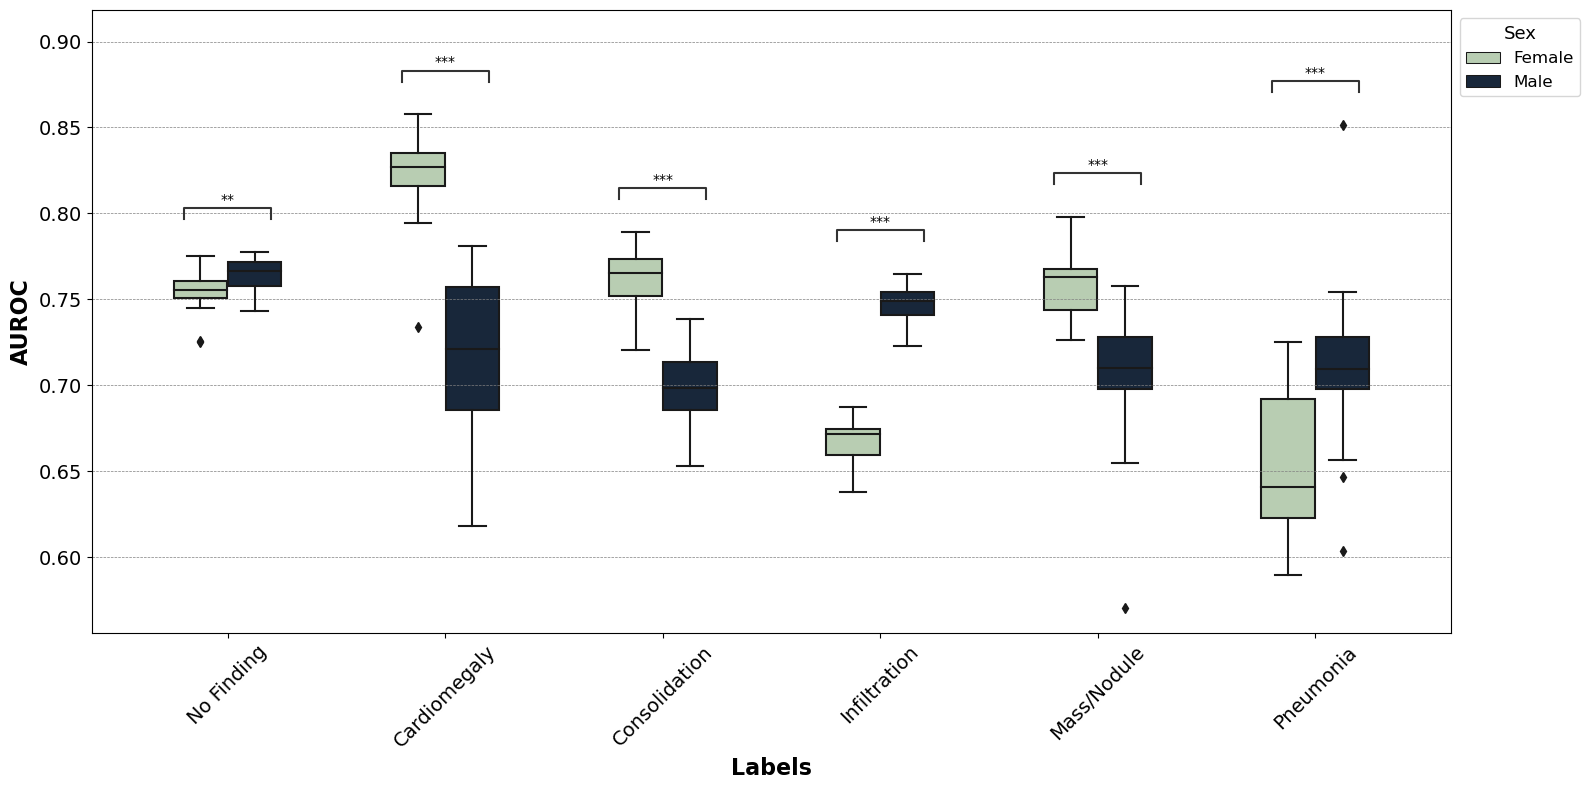

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:1.584e-04
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:4.656e-09
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:1.933e-09
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:5.446e-05
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:1.584e-04
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:3.046e-02


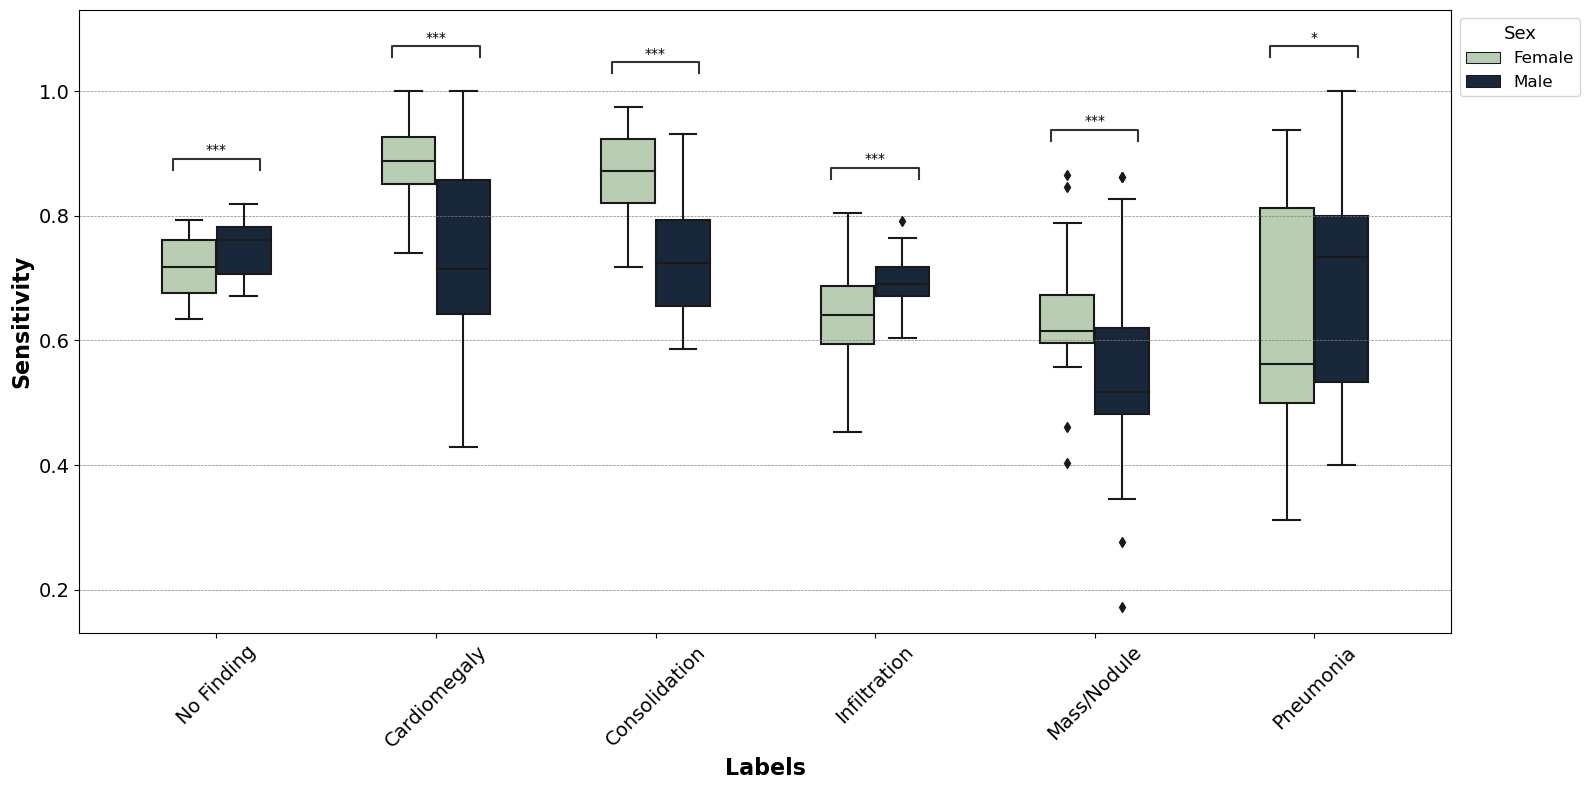

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:5.967e-07
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:1.311e-03
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:1.492e-06
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:2.323e-08
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:6.283e-01
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:9.741e-01


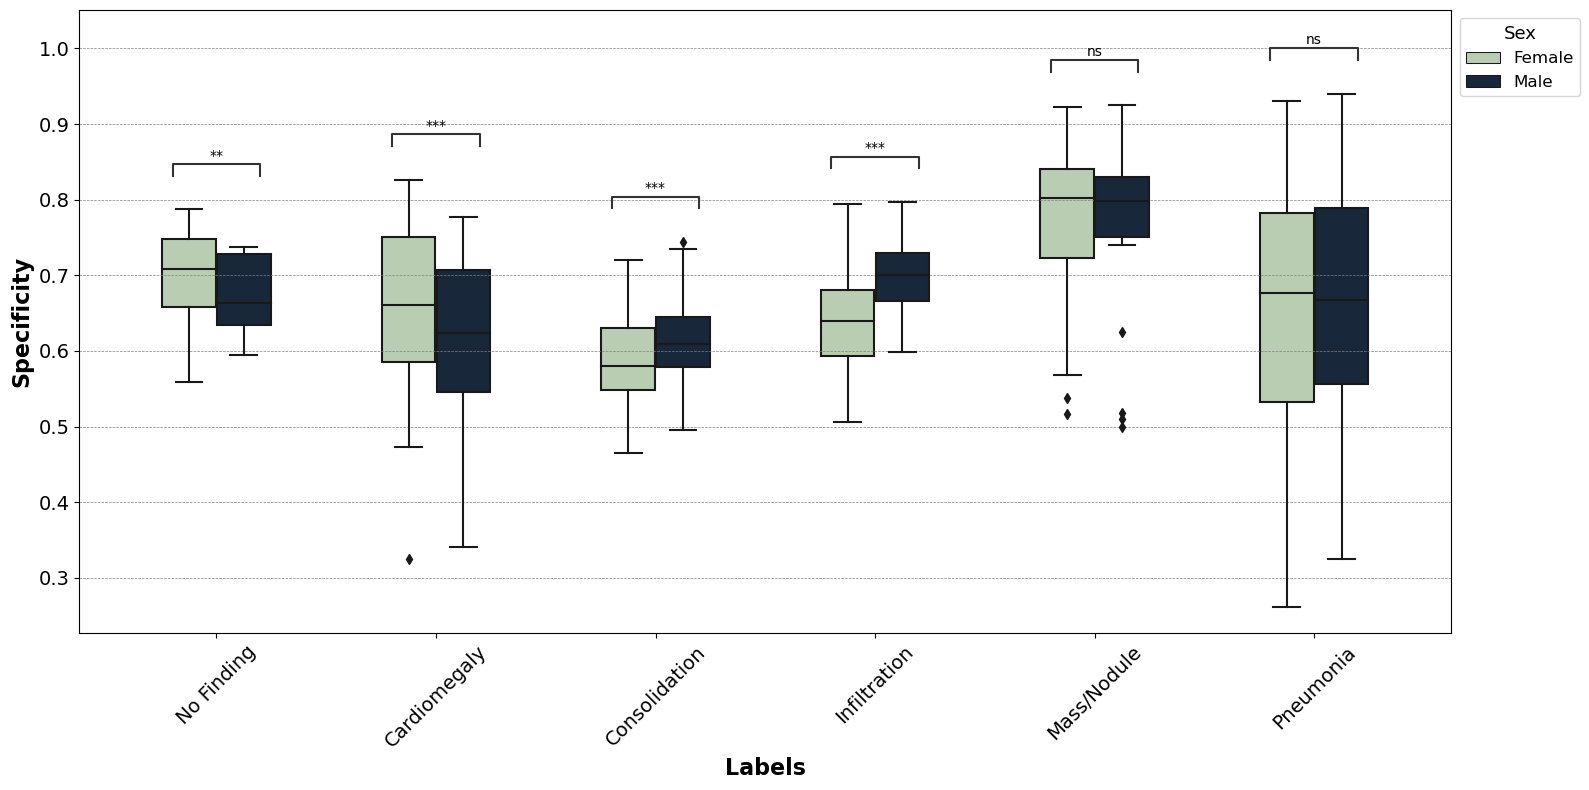

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:7.231e-13
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:9.810e-01
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:3.579e-15
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:2.252e-17
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:6.678e-11
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:9.083e-01


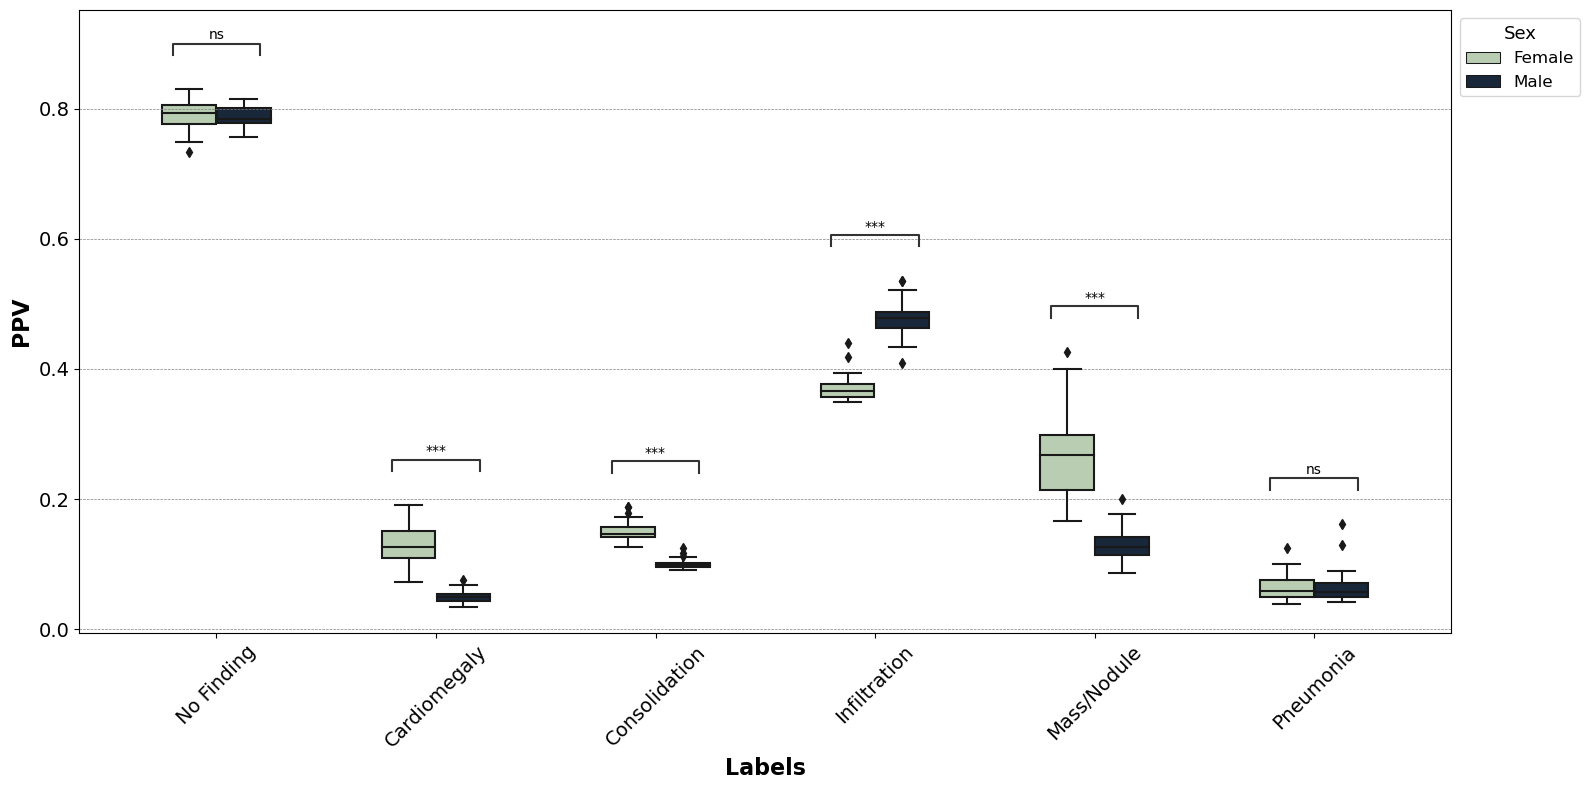

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:6.283e-01
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:1.117e-01
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:1.501e-05
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:1.745e-03
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:3.290e-10
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:3.507e-03


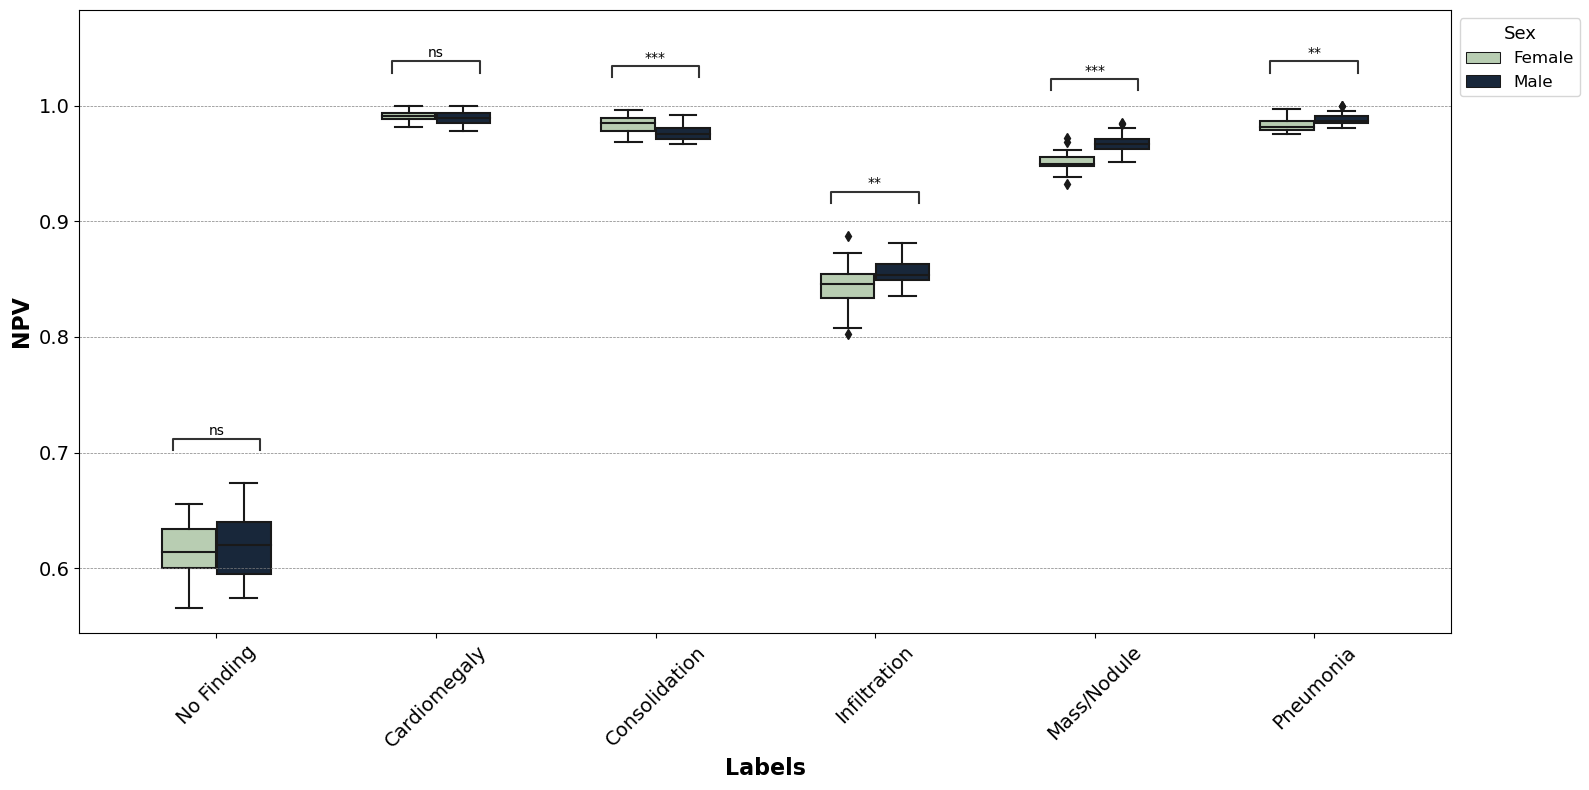

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:1.561e-13
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:7.962e-07
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:1.852e-15
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:6.241e-14
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:3.540e-12
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:7.332e-01


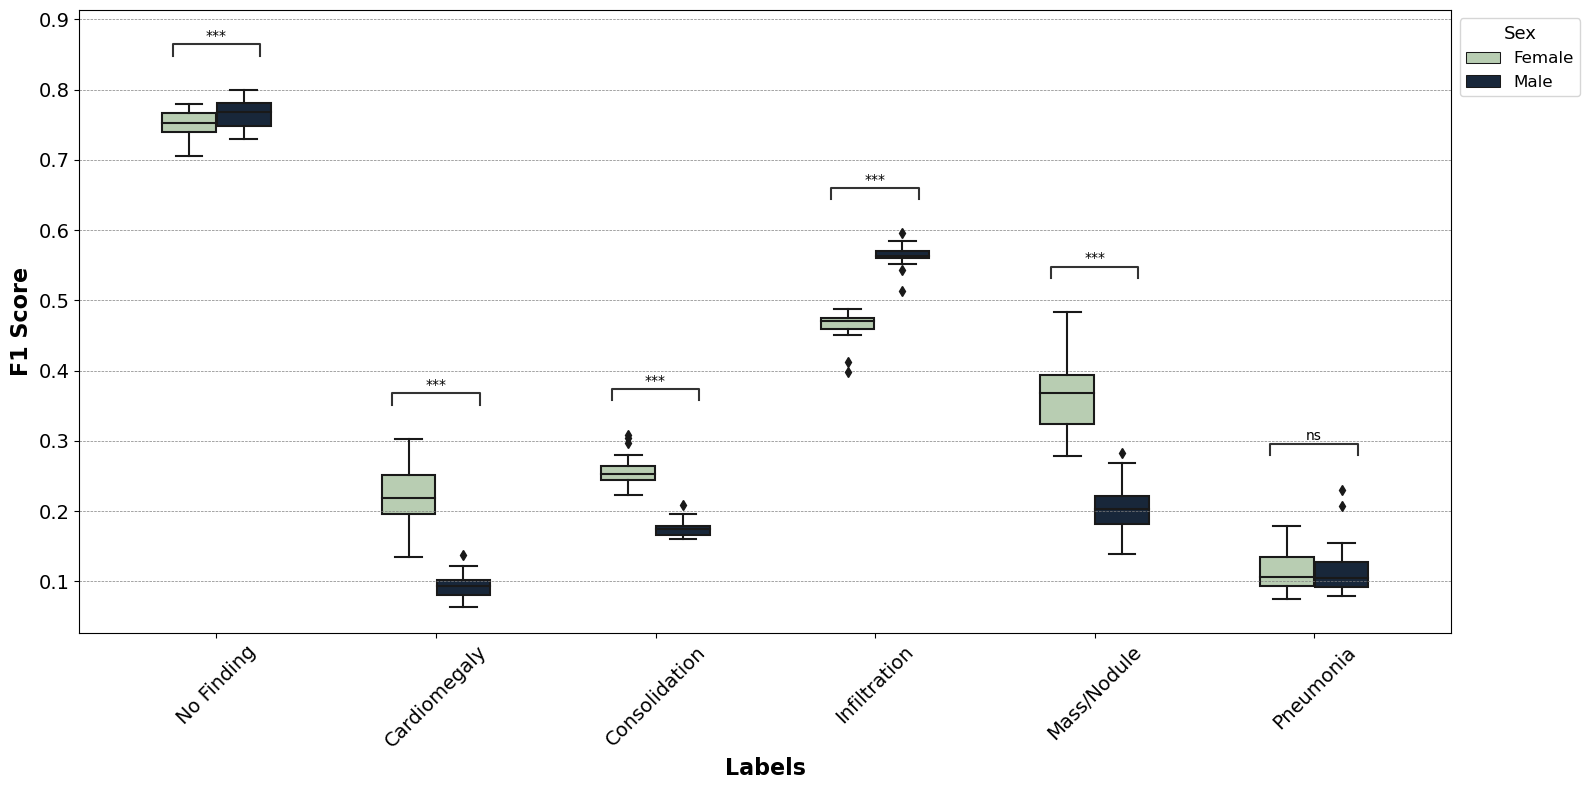

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:5.967e-07
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:1.311e-03
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:1.492e-06
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:2.323e-08
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:6.283e-01
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:9.741e-01


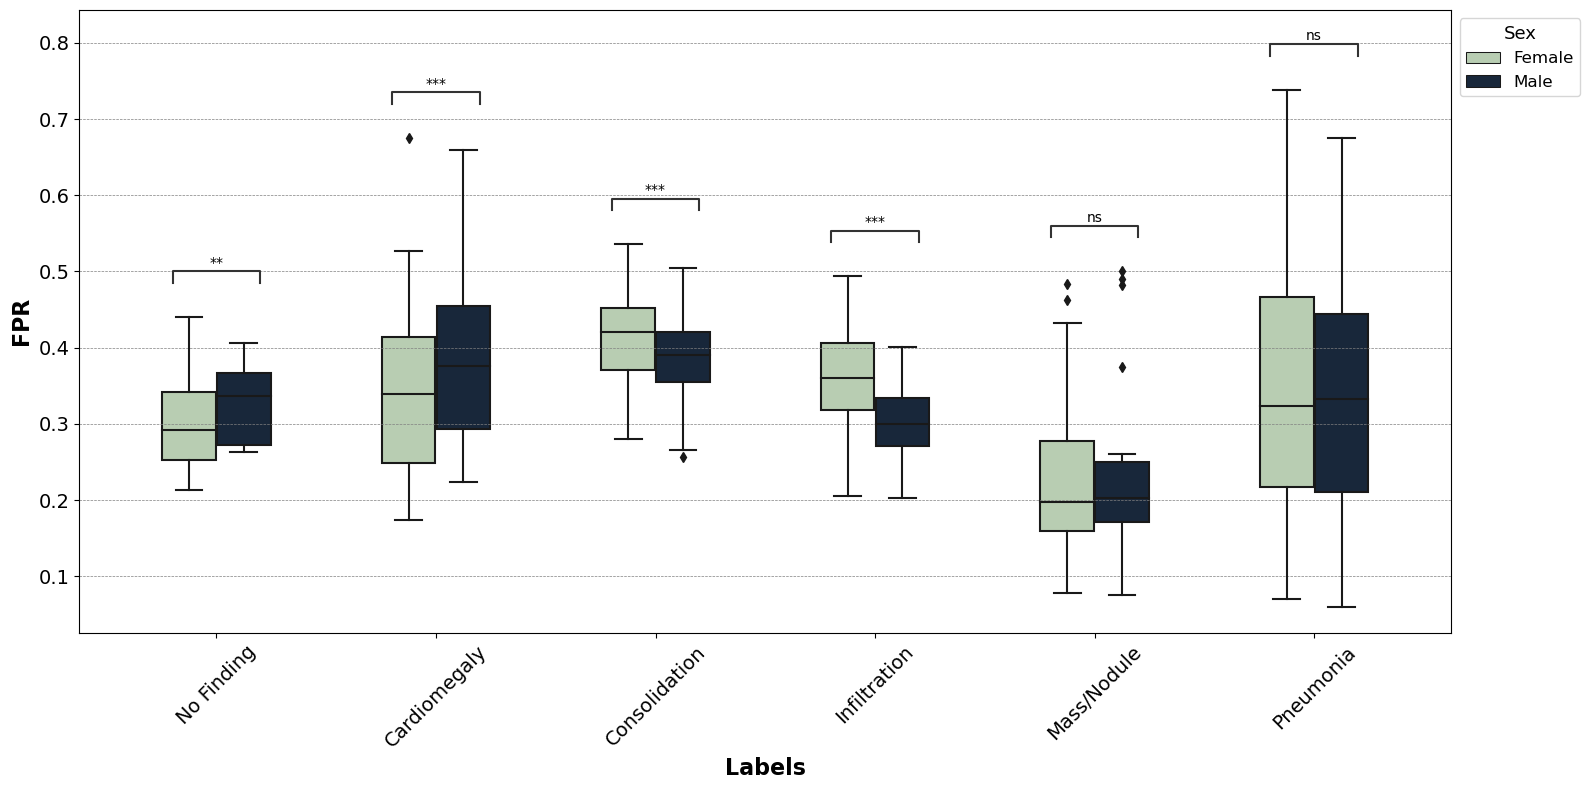

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Cardiomegaly_Female v.s. Cardiomegaly_Male: Custom statistical test, P_val:1.584e-04
No Finding_Female v.s. No Finding_Male: Custom statistical test, P_val:4.656e-09
Consolidation_Female v.s. Consolidation_Male: Custom statistical test, P_val:1.933e-09
Infiltration_Female v.s. Infiltration_Male: Custom statistical test, P_val:5.446e-05
Mass/Nodule_Female v.s. Mass/Nodule_Male: Custom statistical test, P_val:1.584e-04
Pneumonia_Female v.s. Pneumonia_Male: Custom statistical test, P_val:3.046e-02


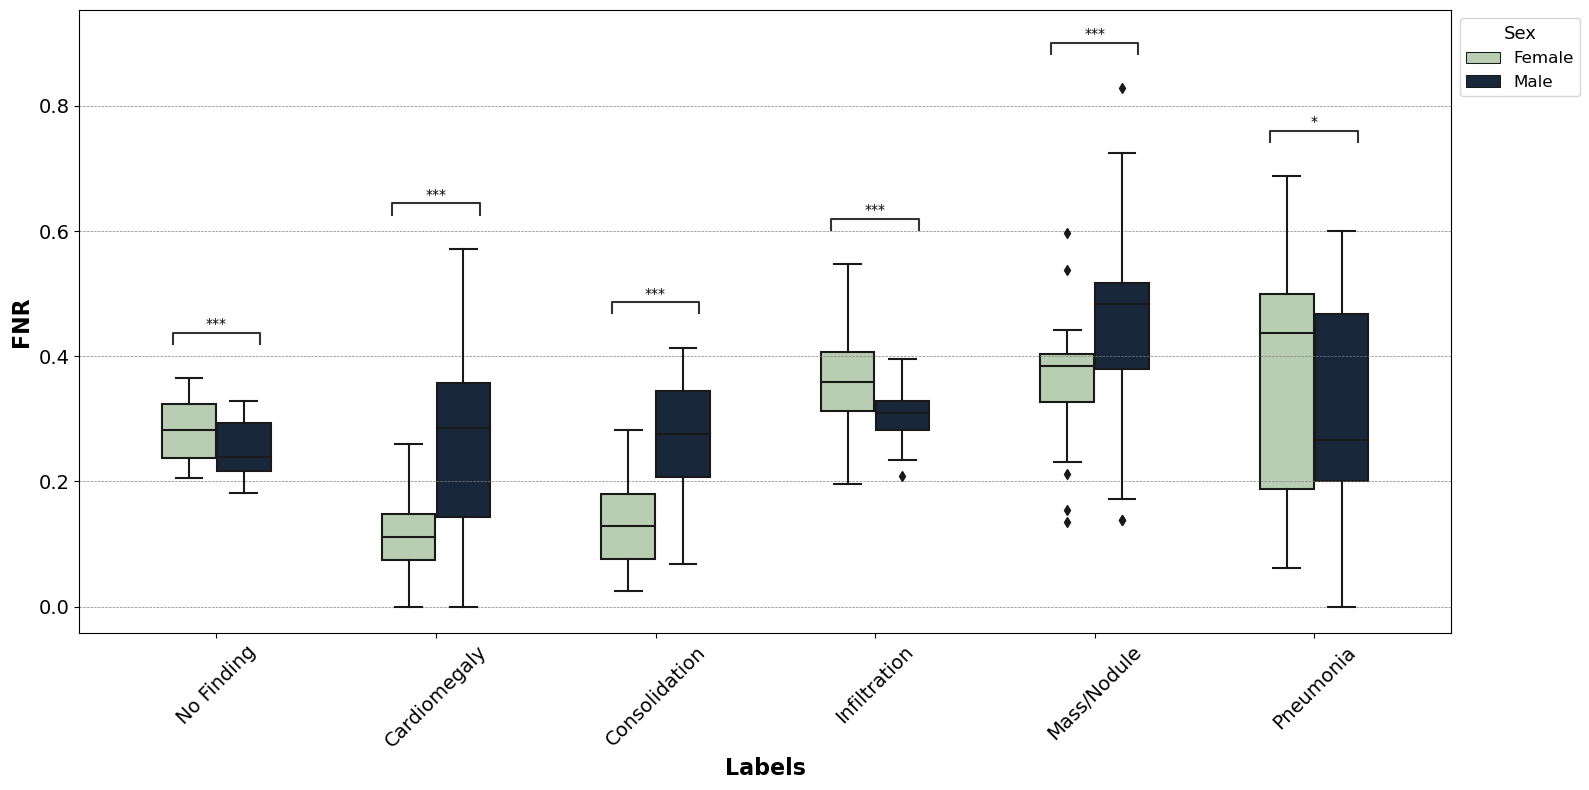

In [20]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import pandas as pd

parent = '/home/jkim/research/peds_cxr/'
# Define paths and read the CSV files
nih_MF_stats = pd.read_csv(parent + "25variation/results/nih/analysis/csv/nih_MF_stats.csv")
metrics_F_all = pd.read_csv(parent + "25variation/results/nih/analysis/csv/metrics_F_all.csv")
metrics_M_all = pd.read_csv(parent + "25variation/results/nih/analysis/csv/metrics_M_all.csv")

# Add sex column to metrics dataframes and combine them
metrics_F_all['Sex'] = 'Female'
metrics_M_all['Sex'] = 'Male'
combined_metrics = pd.concat([metrics_F_all, metrics_M_all])

# Extract unique metrics and labels
unique_metrics = nih_MF_stats['Metric'].unique()
unique_labels = ["No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"]
neutral_palette = ["#b5d1ae", "#122740"]

for metric in unique_metrics:
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.boxplot(x='Label', y=metric, hue='Sex', data=combined_metrics, ax=ax, order=unique_labels, palette=neutral_palette, width=0.5)
    
    # Other plot adjustments
    ax.set_xlabel('Labels', fontsize=16, fontweight='bold')
    ax.set_ylabel(metric, fontsize=16, fontweight='bold')
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', axis='y')

    # Prepare a list of tuples for box_pairs
    box_pairs = [((label, 'Female'),(label, 'Male')) for label in unique_labels]
    
    # Extract p-values for each label and metric combination
    p_values = [nih_MF_stats[(nih_MF_stats['Metric'] == metric) & 
                                    (nih_MF_stats['Label'] == label)]['p_value_after_BH'].values[0] 
                for label in unique_labels]
    
    # Add statistical annotation
    add_stat_annotation(ax, data=combined_metrics, x='Label', y=metric, hue='Sex',
                        box_pairs=box_pairs, perform_stat_test=False, pvalues=p_values, 
                        test_short_name='Custom', loc='inside', verbose=2, 
                        pvalue_thresholds=[(0.001, '***'), (0.01, '**'), (0.05, '*'), (1, 'ns')])
    
    ax.legend(title='Sex', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))


    # Save the plot
    plt.tight_layout()
    plot_file_path = parent + f'25variation/results/nih/analysis/plot/MF/{metric}_comparison.jpeg'
    plt.savefig(plot_file_path, format='jpeg')
    plt.show()
    plt.close(fig)